In [25]:
%load_ext autoreload
%matplotlib inline
%autoreload 2
import pylab
import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=500)

plt.rc('text', usetex=True)
import numpy

from matplotlib import rc, rcParams

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Computer Modern']})
cols = ['#29A2C6','#FF6D31','#FFCB18','#73B66B','#EF597B', '#333333']

font = {'family' : 'serif',
        'weight' : 'bold'}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
MCEqPath="/Users/jonesb/Documents/Work/SolarAtmosphere/MCEq"
OutputDir="/Users/jonesb/Documents/Work/SolarAtmosphere/Outputs/"
import os
import sys
from os.path import join
os.chdir(MCEqPath)
sys.path.append(MCEqPath+"/MCEqRunner")


import MCEqRunF

In [27]:
IDToName,NameToID=MCEqRunF.MakeNameDicts()

In [28]:
def MakePiKPromptPositionPlots(FileName, mag=3):
    initialmag=2.
    mag=float(mag)-initialmag
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    XArray=numpy.loadtxt(FileName)
    XGrid=XArray[1]/(100.*1000.)

    pylab.figure(figsize=(4,4)) 
    pylab.ylabel(r'Integrated Flux: $\Phi_{\nu}$ (cm$^{2}$ s sr GeV)$^{-1}$')

    LabelGuy=r'$\nu$ (solid) and $\bar \nu$ (dashed)'
    FancyNames=[r"$\nu_e$",r"$\nu_\mu$",r"$\nu_\tau$"]
    neutrinos=['nue','numu','nutau']
    Colors=['darkred','darkblue','darkgreen']
    for i in range(0,3):
        NuType=neutrinos[i]
        
        TotalSoln_Nu=XArray[NameToID["total_"+NuType]+2]
        TotalSoln_Nubar=XArray[NameToID["total_anti"+NuType]+2]

        pylab.plot(XGrid, TotalSoln_Nu,label=FancyNames[i],linestyle='-',linewidth=1,color=Colors[i])
        pylab.plot(XGrid, TotalSoln_Nubar,linestyle='--',linewidth=1,color=Colors[i])
        pylab.xlim(100,1e4)
    pylab.legend(loc='lower right')
    pylab.ylim(1e-20,1e-2)

    

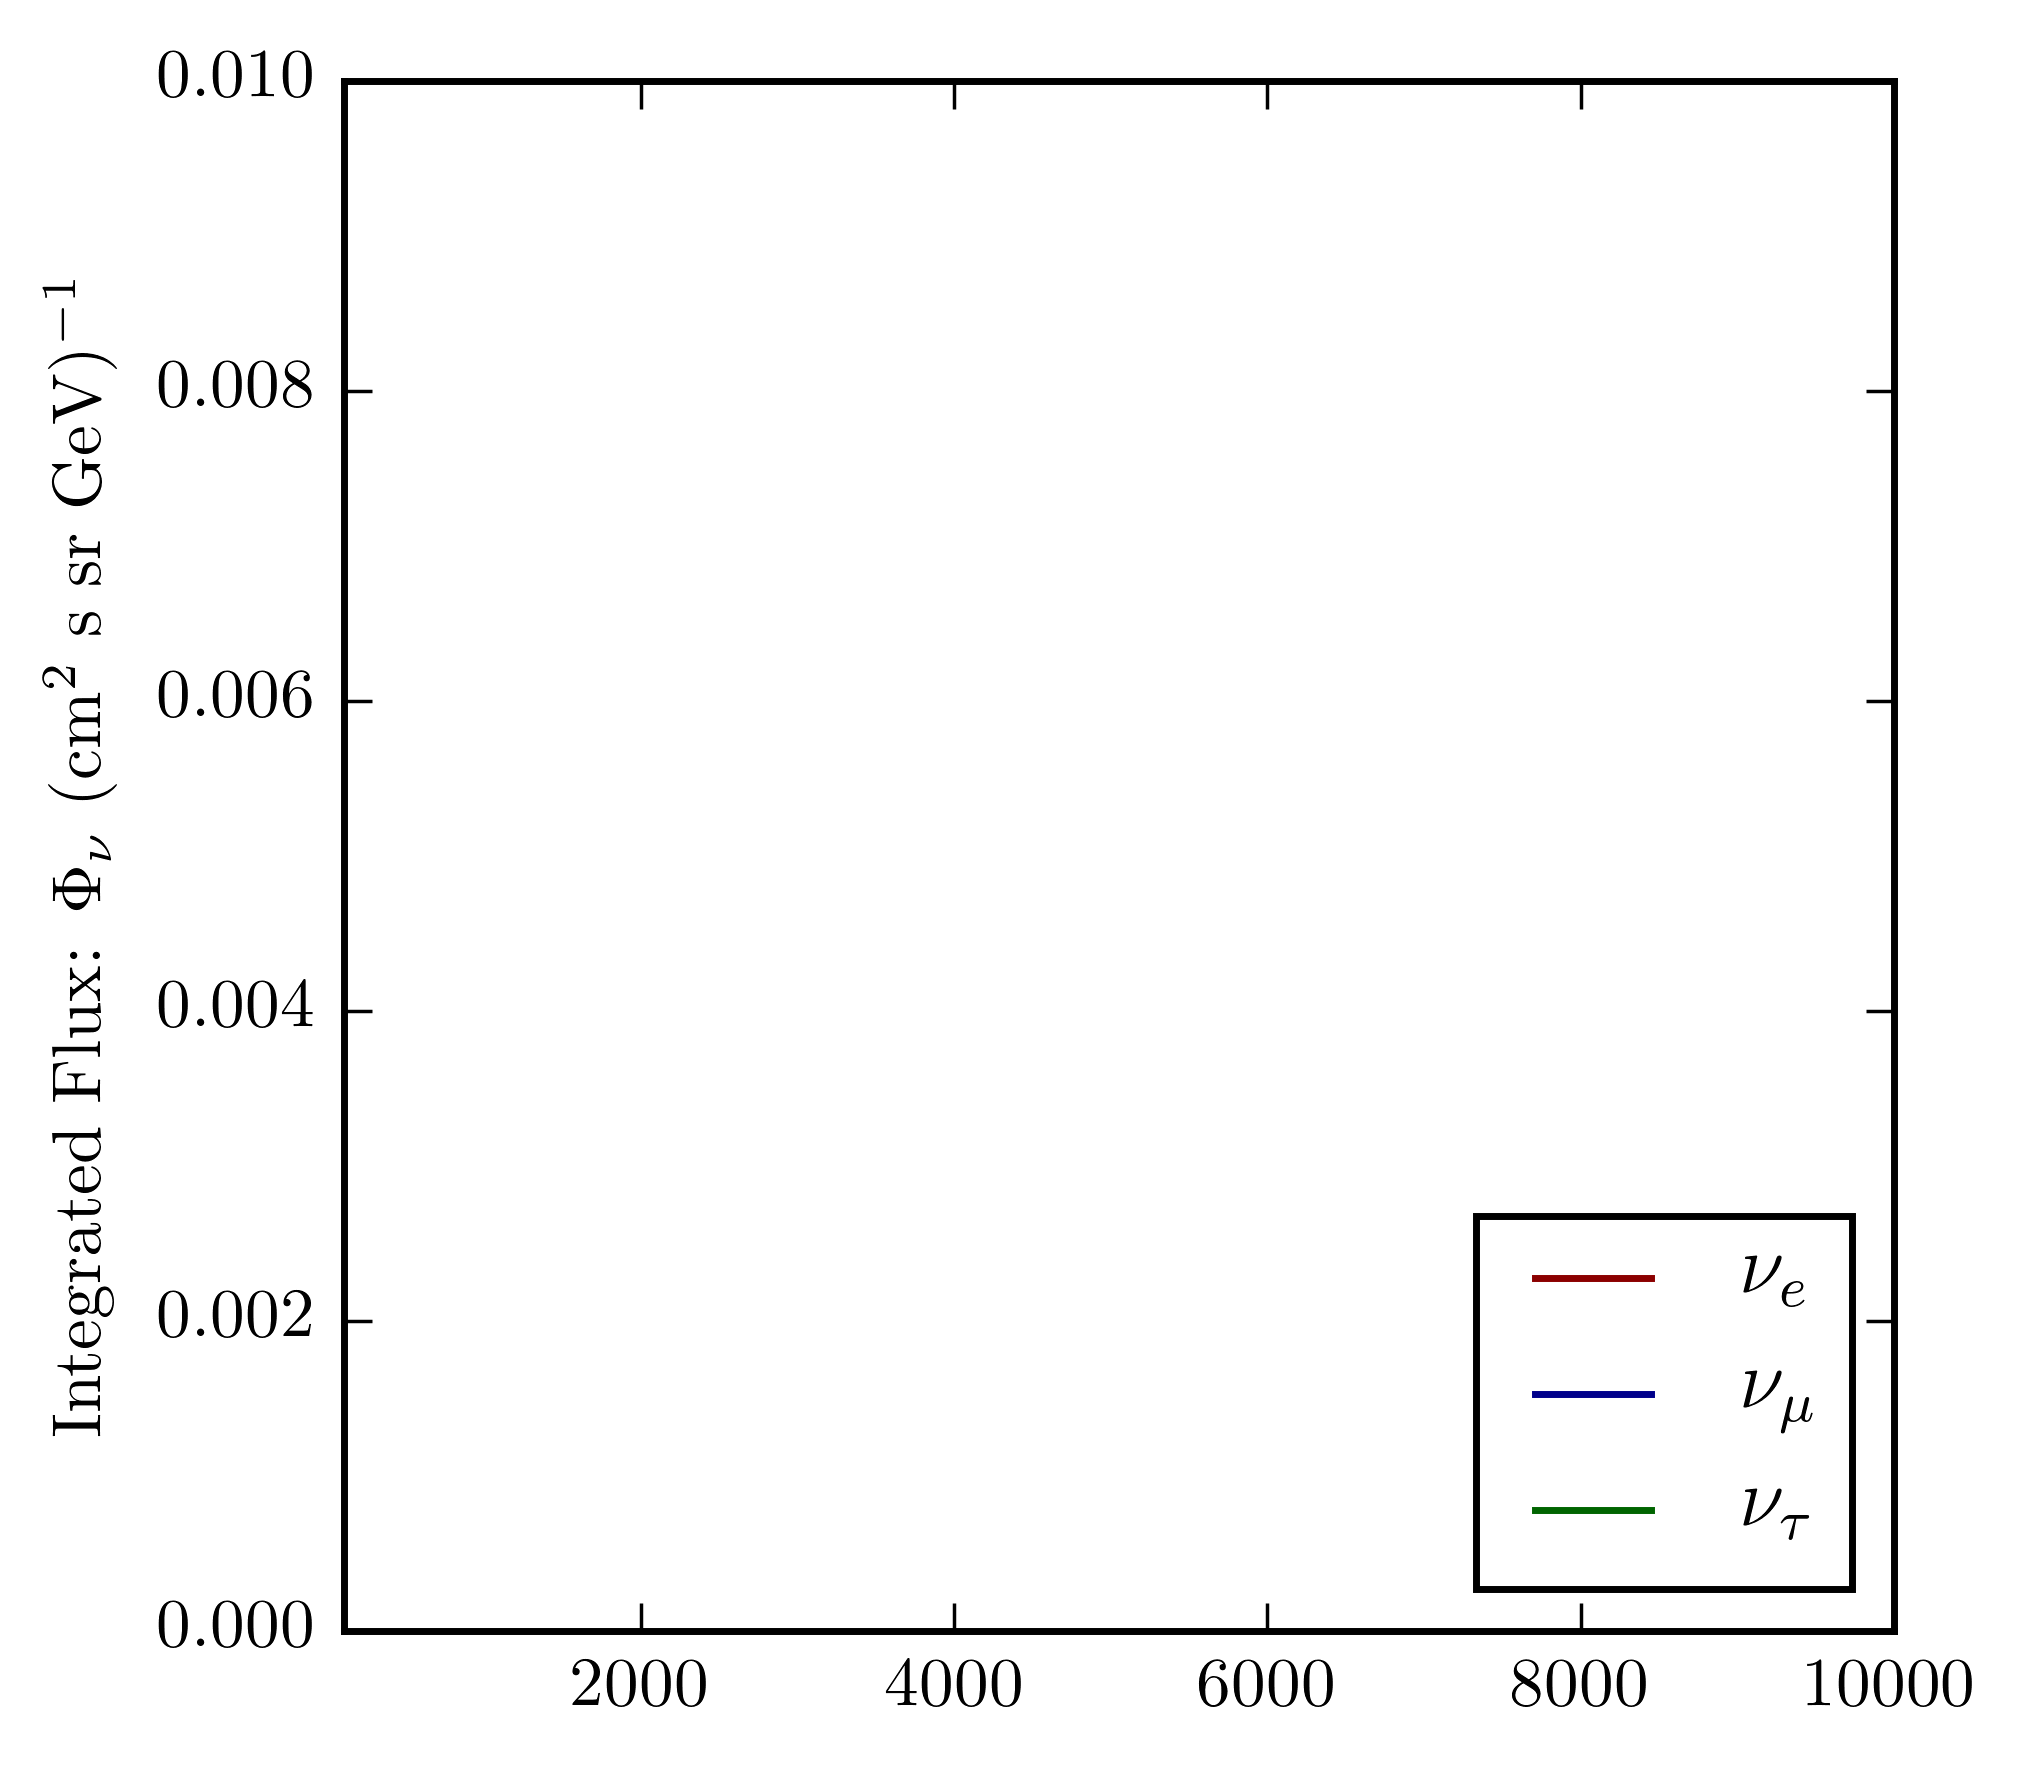

In [29]:
FileName="/Users/jonesb/Documents/Work/SolarAtmosphere/Outputs/HybridModelShorter_SIBYLL2.3_pp_CombinedGHAndHG_H4a/flux_0.0_b0.0000_E.txt"

MakePiKPromptPositionPlots(FileName,mag=3)



In [30]:
def MakePiKPromptEnergyPlots(FileName,mag=3):
    initialmag=2.
    mag=float(mag)-initialmag
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    EArray=numpy.loadtxt(FileName)
    EGrid=EArray[0]
    dummy=numpy.ones_like(EGrid)*100
    f, axes = pylab.subplots(1,3,  sharey=True,figsize=(9,3.75))
    
    LabelGuy=r'$\nu$ (solid) and $\bar \nu$ (dashed)'
    FancyNames=[r"$\nu_e$",r"$\nu_\mu$",r"$\nu_\tau$"]
    neutrinos=['nue','numu','nutau']
    for i in range(0,3):
        NuType=neutrinos[i]
        ax=axes[i]


        TotalSoln=EArray[NameToID["total_"+NuType]+1]+EArray[NameToID["total_anti"+NuType]+1]
        TotalSoln_Nu=EArray[NameToID["total_"+NuType]+1]
        TotalSoln_Nubar=EArray[NameToID["total_anti"+NuType]+1]



        
        ax.loglog(EGrid, TotalSoln*pow(EGrid,mag),label=r'Total',linestyle='-',linewidth=1,color='black')



        TotalComponents_Nu=numpy.zeros_like(TotalSoln)
        TotalComponents_Nubar=numpy.zeros_like(TotalSoln)
    
        Soln=EArray[NameToID["pi_"+NuType]+1]
        TotalComponents_Nu+=Soln
        if sum(Soln)>0:
            ax.loglog(EGrid, Soln*pow(EGrid,mag),label=r'from $\pi^{\pm}$',linestyle='-',color='red')
        else:
            ax.loglog(EGrid, dummy, label=r'from $\pi^{\pm}$',linestyle='-',color='red')
        Soln=EArray[NameToID["pi_anti"+NuType]+1]
        TotalComponents_Nubar+=Soln
        if sum(Soln)>0:
            ax.loglog(EGrid, Soln*pow(EGrid,mag),linestyle='--',color='red')
        Soln=EArray[NameToID["k_"+NuType]+1]
        TotalComponents_Nu+=Soln
        if sum(Soln)>0:
            ax.loglog(EGrid, Soln*pow(EGrid,mag),label=r'from $K^{\pm}$',linestyle='-',color='green')
        else:
            ax.loglog(EGrid, dummy,label=r'from $K^{\pm}$',linestyle='-',color='green')
        Soln=EArray[NameToID["k_anti"+NuType]+1]
        TotalComponents_Nubar+=Soln
        if sum(Soln)>0:
            ax.loglog(EGrid, Soln*pow(EGrid,mag),linestyle='--',color='green')
        Soln=EArray[NameToID["obs_"+NuType]+1]
        TotalComponents_Nu+=Soln
        if sum(Soln)>0:
            ax.loglog(EGrid, Soln*pow(EGrid,mag),label=r'from $\mu^{\pm}$',linestyle='-',color='orange')
        else:
            ax.loglog(EGrid, dummy, label=r'from $\mu^{\pm}$',linestyle='-',color='orange')

        Soln=EArray[NameToID["obs_anti"+NuType]+1]
        TotalComponents_Nubar+=Soln
        if sum(Soln)>0:
            ax.loglog(EGrid, Soln*pow(EGrid,mag),linestyle='--',color='orange')
        Soln=EArray[NameToID["pr_"+NuType]+1]
        TotalComponents_Nu+=Soln
        if sum(Soln)>0:
            ax.loglog(EGrid, Soln*pow(EGrid,mag),label=r'from prompt',linestyle='-',color='purple')
        else:
            ax.loglog(EGrid, dummy, label=r'from charm',linestyle='-',color='purple')


        Soln=EArray[NameToID["pr_anti"+NuType]+1]
        TotalComponents_Nubar+=Soln
        if sum(Soln)>0:
            ax.loglog(EGrid, Soln*pow(EGrid,mag),linestyle='--',color='purple')

        ax.plot(EGrid,TotalSoln_Nu-TotalComponents_Nu,color='grey',label='other')
        ax.plot(EGrid,TotalSoln_Nubar-TotalComponents_Nubar,'--',color='grey')


   # pylab.legend(loc='lower left',title=LabelGuy,fontsize=10)
        ax.set_ylim(1e-8,1)
        ax.set_xlim(10,1e5)


        ax.set_xlabel(r"$E_\nu$/GeV",fontsize=14)
        ax.text(15,0.225,FancyNames[i],fontsize=16)
        if(i==0): 
            ax.set_ylabel(r"$\Phi_{\nu}$ ($E_\nu$/GeV)$^3$ (cm$^{2}$ s sr GeV)$^{-1}$",fontsize=14)
            ax.set_xticks([10,100,1000,10000])

        if(i==1):
             ax.set_xticks([10,100,1000,10000])

        if(i==2):
            ax.legend(loc='upper right')
        ax.tick_params(axis='both', which='major', labelsize=14)
        plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
        f.subplots_adjust(wspace=0.05)
    pylab.savefig("SIBYLL2p3_HillasGaisser_Hybrid_Triptich.png",bbox_inches=0)
    pylab.show()
    
    
    

In [31]:
def MakePromptEnergyPlots(FileNames,Labels,mag=3):
    initialmag=2.
    mag=float(mag)-initialmag
    IDToName,NameToID=MCEqRunF.MakeNameDicts()

    f, axes = pylab.subplots(1,3,  sharey=True,figsize=(9,3.75))
    Colors=['purple','darkgreen']
    LabelGuy=r'$\nu$ (solid) and $\bar \nu$ (dashed)'
    FancyNames=[r"$\nu_e$",r"$\nu_\mu$",r"$\nu_\tau$"]
    neutrinos=['nue','numu','nutau']
    for i in range(0,3):
        count=0
        for filen in FileNames:
            EArray=numpy.loadtxt(filen)
            EGrid=EArray[0]
            dummy=numpy.ones_like(EGrid)*100


            NuType=neutrinos[i]
            ax=axes[i]

            Soln=EArray[NameToID["pr_"+NuType]+1]
            if sum(Soln)>0:
                ax.loglog(EGrid, Soln*pow(EGrid,mag),label=Labels[count],linestyle='-',color=Colors[count])
            else:
                ax.loglog(EGrid, dummy, label=Labels[count],linestyle='-',color=Colors[count])


            Soln=EArray[NameToID["pr_anti"+NuType]+1]
            if sum(Soln)>0:
                ax.loglog(EGrid, Soln*pow(EGrid,mag),linestyle='--',color=Colors[count])

   
   # pylab.legend(loc='lower left',title=LabelGuy,fontsize=10)
            ax.set_ylim(1e-8,1e-3)
            ax.set_xlim(10,1e5)


            ax.set_xlabel(r"$E_\nu$/GeV",fontsize=14)
            ax.text(4e4,1.5e-8,FancyNames[i],fontsize=16)
            if(i==0): 
                ax.set_ylabel(r"$\Phi_{\nu}$ ($E_\nu$/GeV)$^3$ (cm$^{2}$ s sr GeV)$^{-1}$",fontsize=14)
                ax.set_xticks([10,100,1000,10000])

            if(i==1):
                 ax.set_xticks([10,100,1000,10000])

            if(i==2):
                ax.legend(loc='upper right')
            ax.tick_params(axis='both', which='major', labelsize=14)
            plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
            f.subplots_adjust(wspace=0.05)
            count=count+1
    pylab.savefig("Prompt_Triptich.png",bbox_inches=0,dpi=400)
    pylab.show()
    

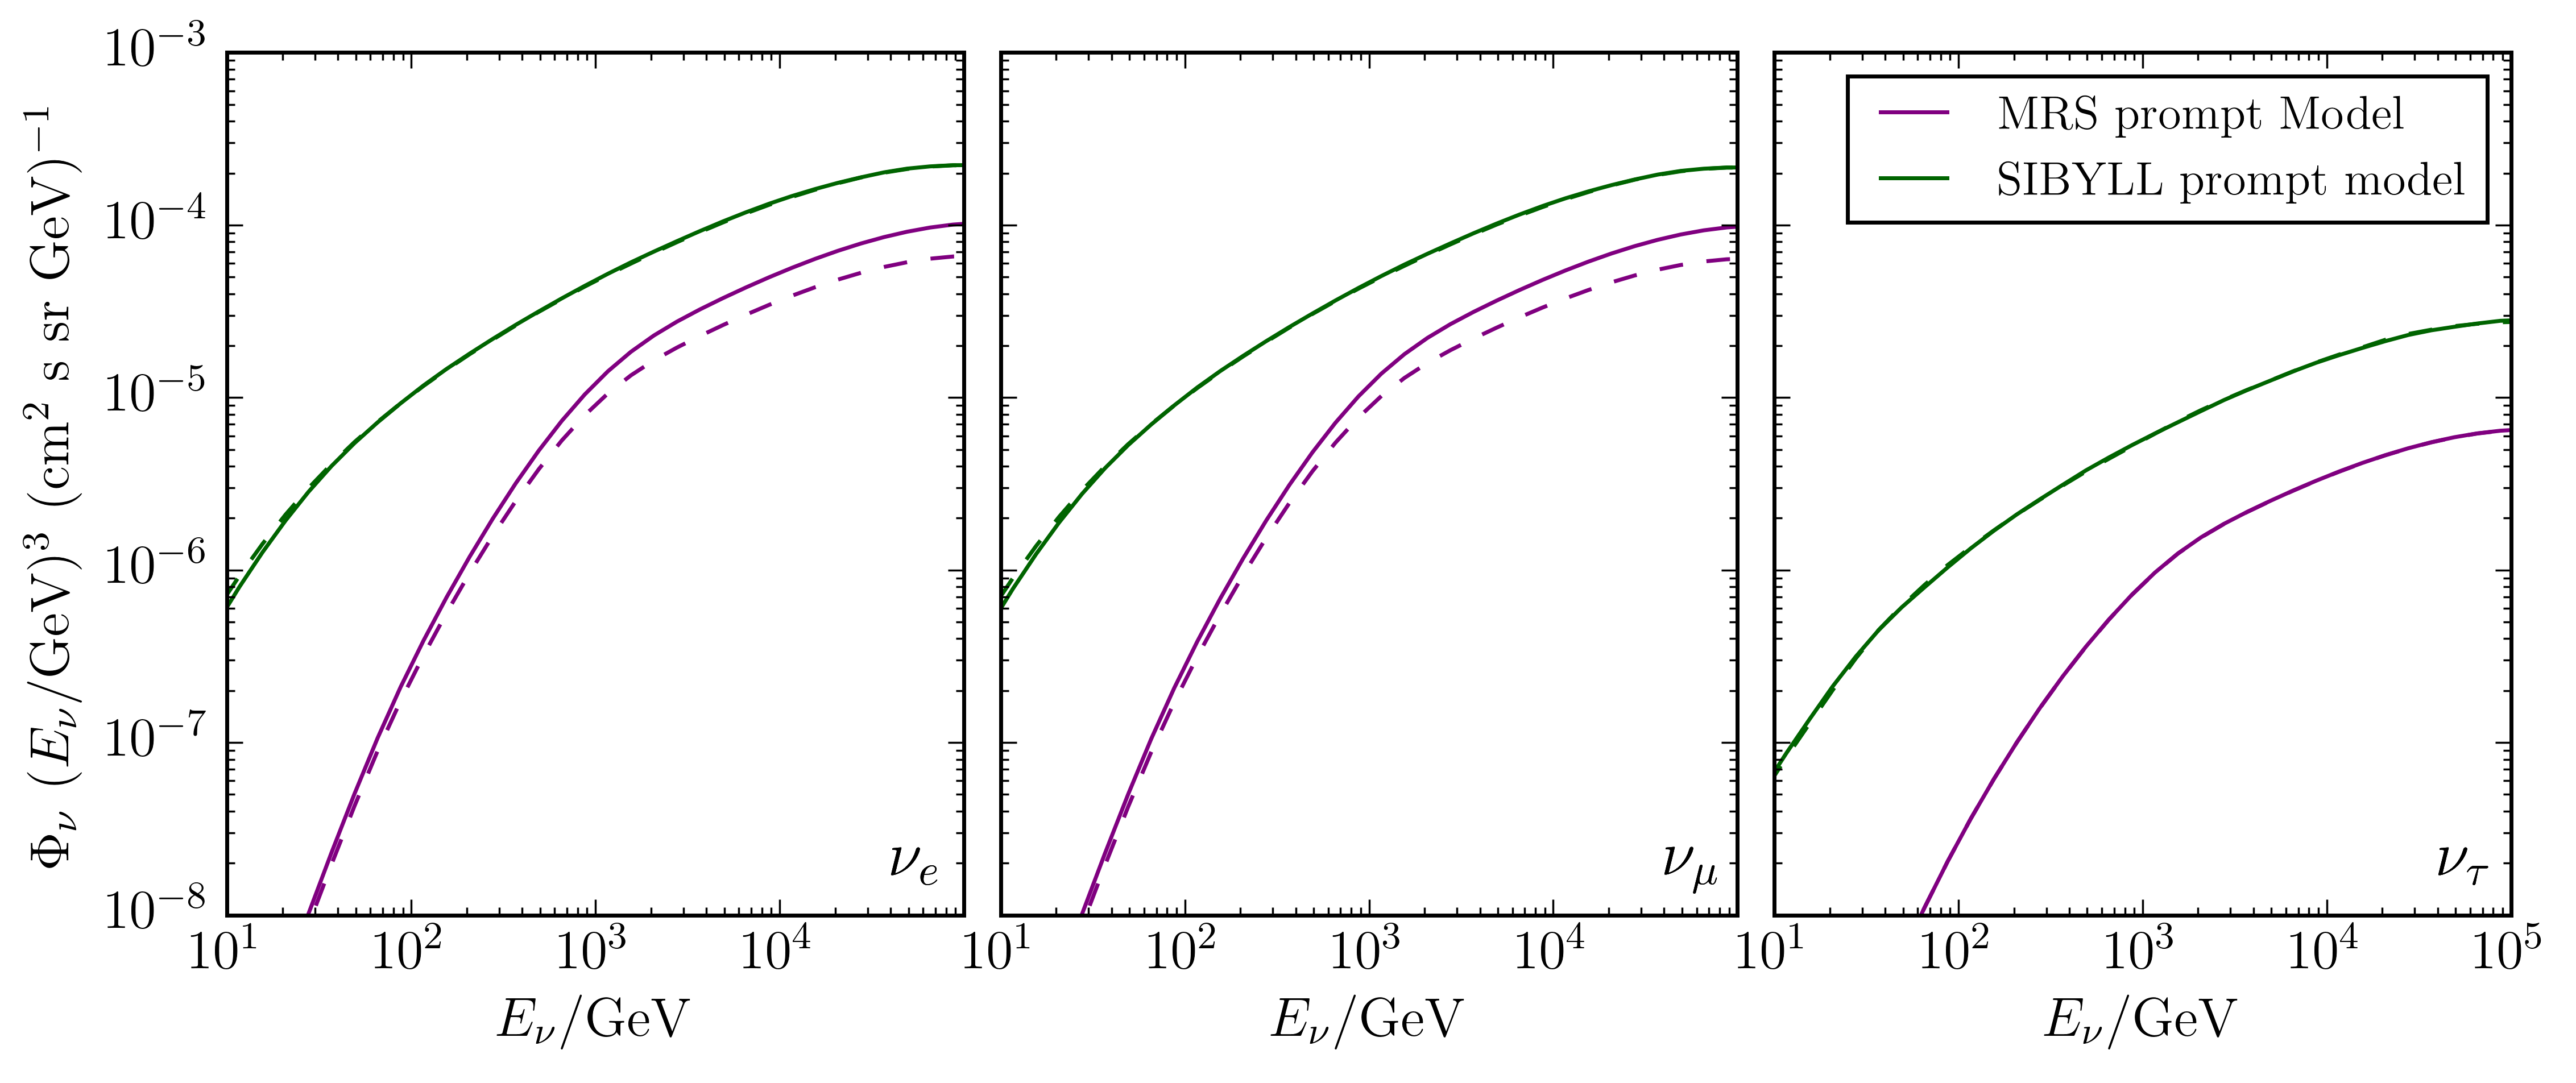

In [32]:

PromptFileNames=[]
PromptFileNames.append('../OutputsTmp/HybridModel_QGSJET-II-04_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt')
PromptFileNames.append('../OutputsTmp/HybridModel_SIBYLL2.3_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt')
Labels=['MRS prompt Model',"SIBYLL prompt model"]

MakePromptEnergyPlots(PromptFileNames,Labels,mag=3)



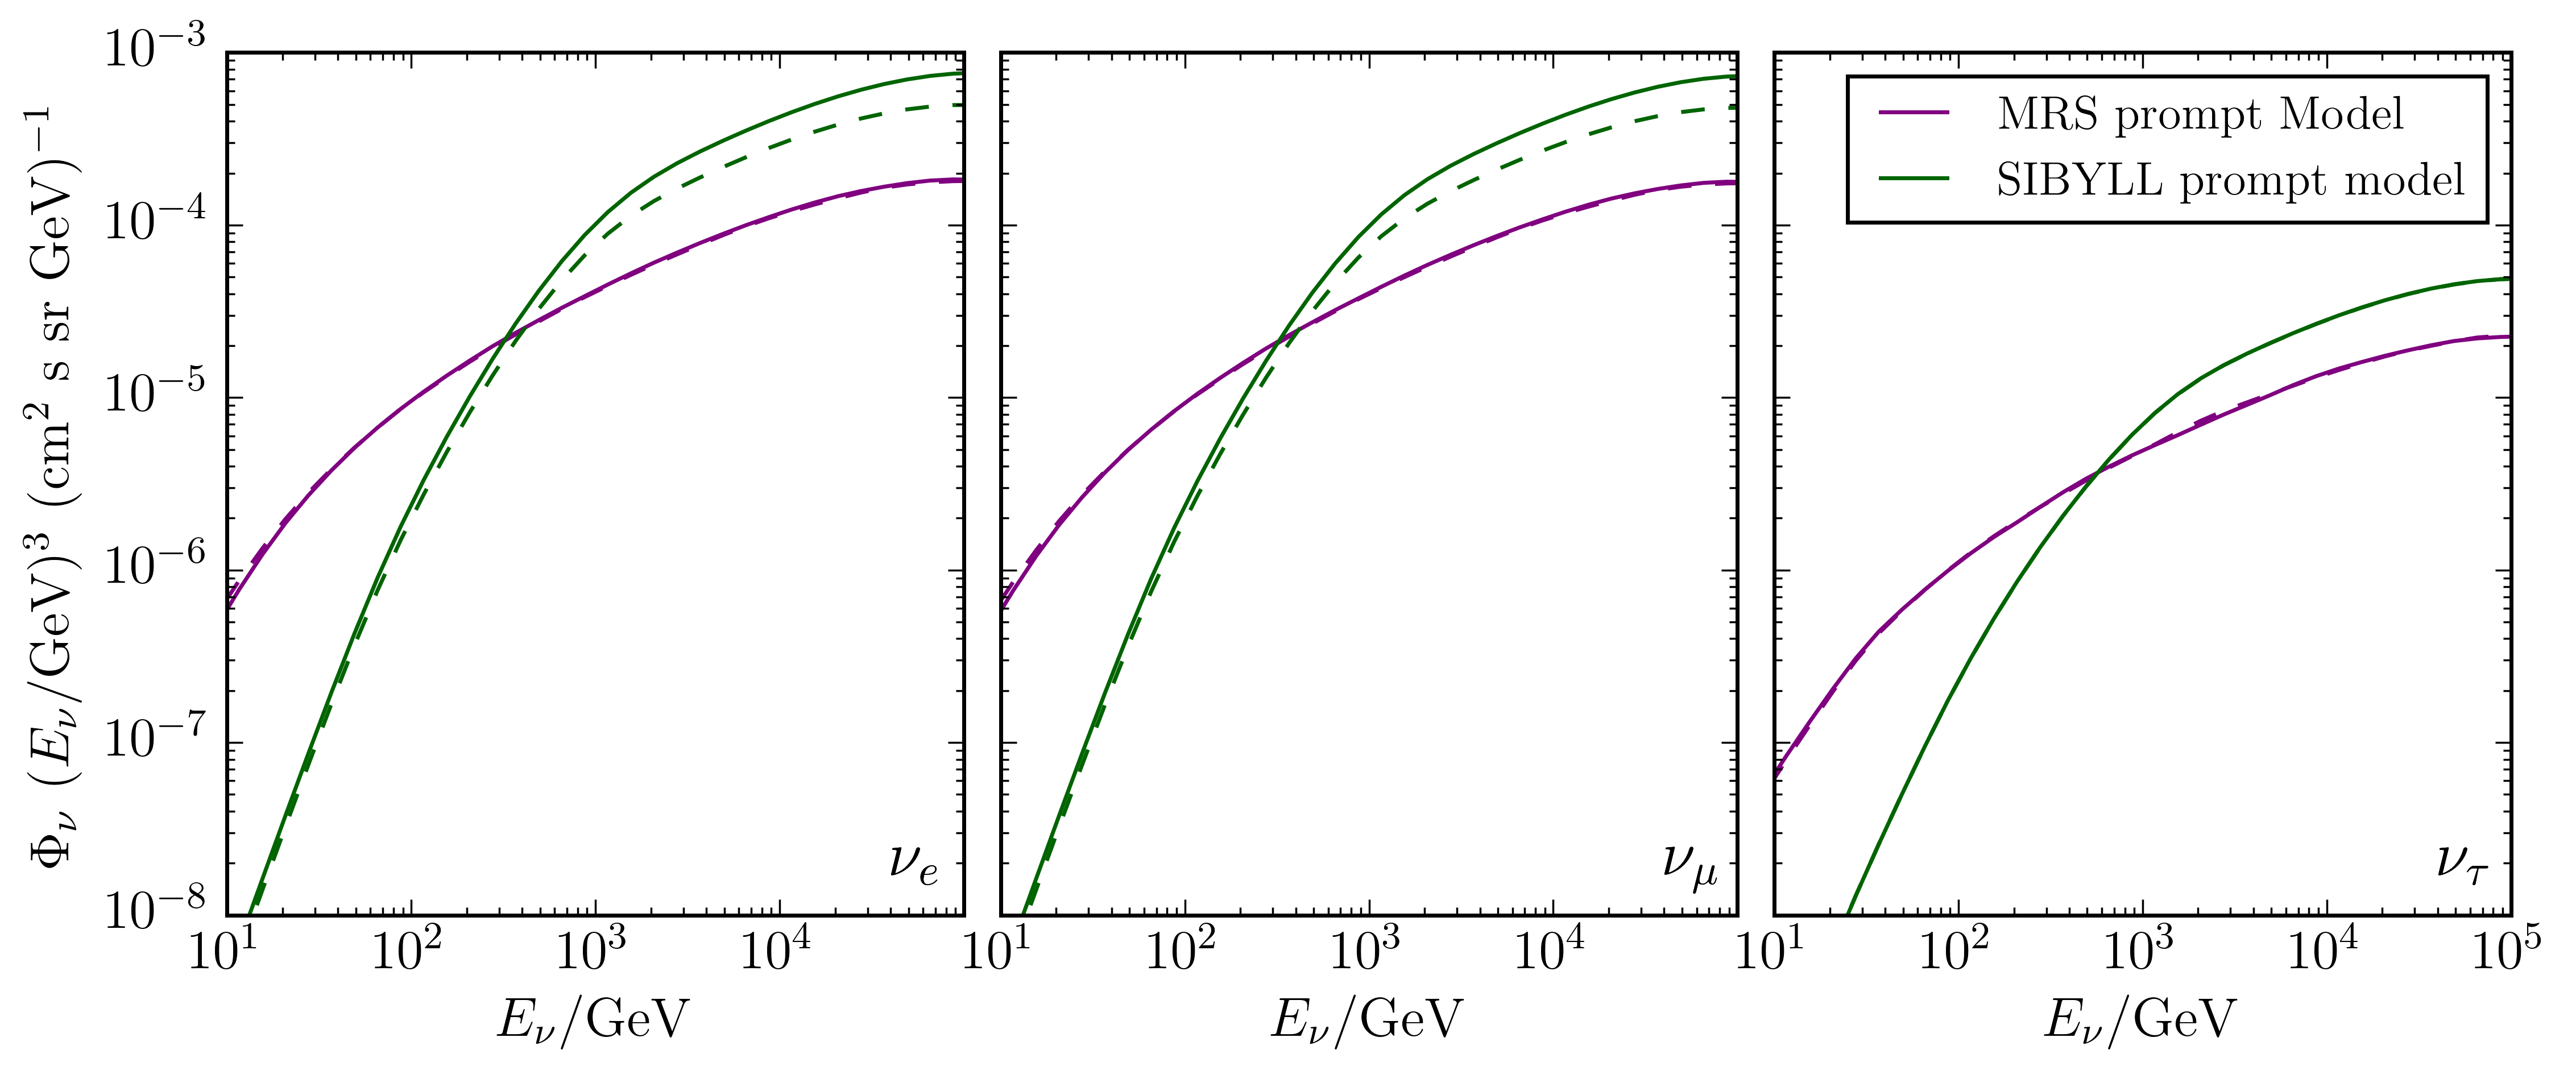

In [33]:

PromptFileNames=[]
PromptFileNames.append('../OutputsCorrected/HybridModelShorter_SIBYLL2.3_pp_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt')
PromptFileNames.append('../OutputsCorrected/HybridModelShorter_SIBYLL2.3_ppMRS_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt')
Labels=['MRS prompt Model',"SIBYLL prompt model"]

MakePromptEnergyPlots(PromptFileNames,Labels,mag=3)



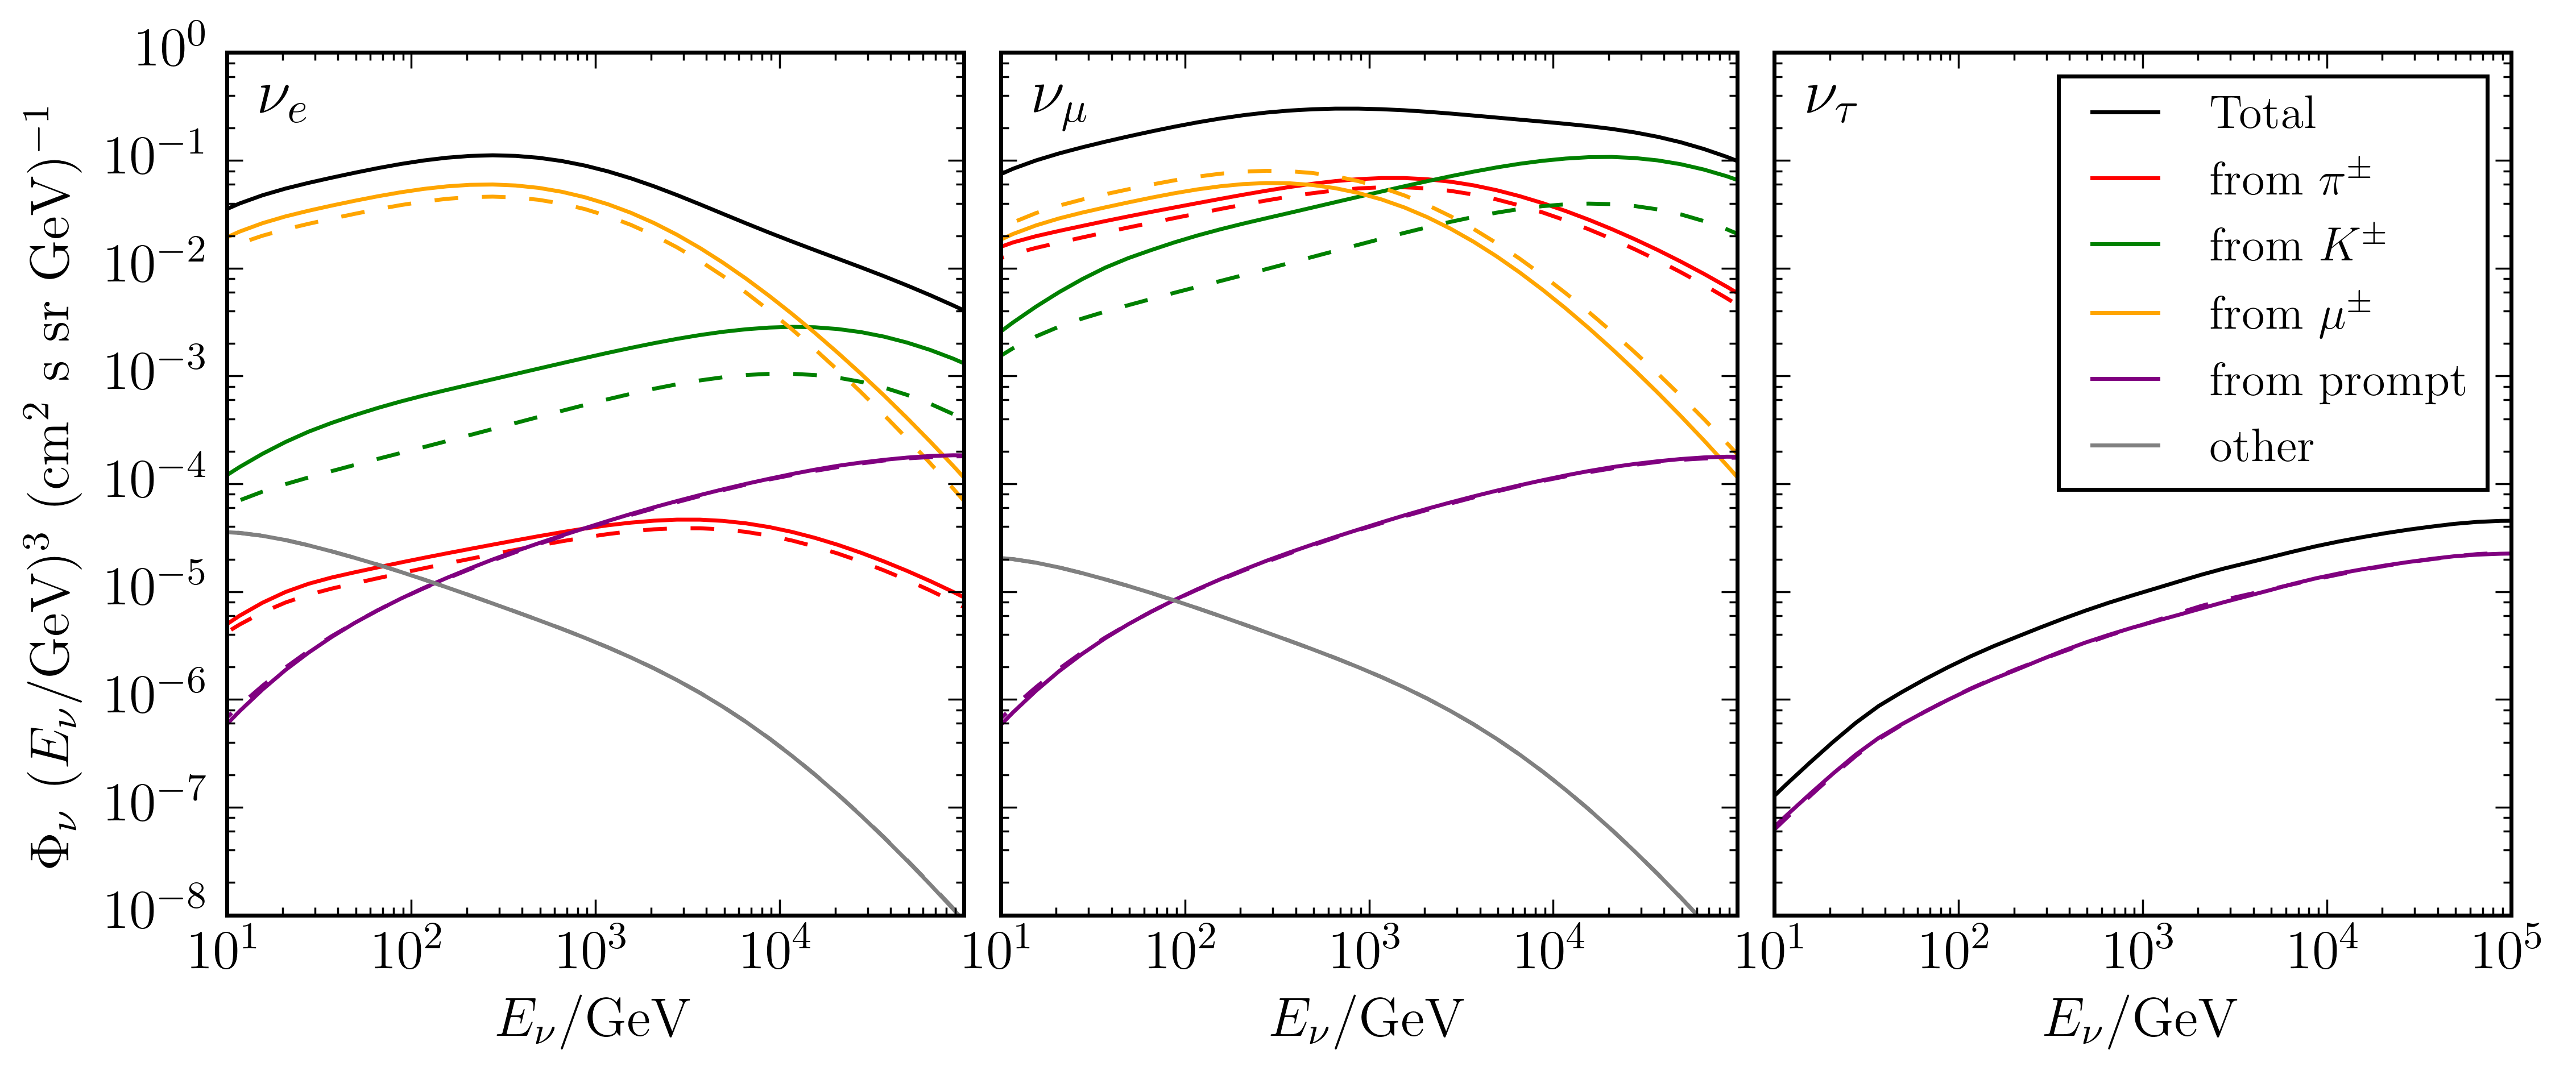

In [34]:
#FileName="/Users/jonesb/Documents/Work/SolarAtmosphere/MuonTests/HybridModelWithELoss/flux_0.0_b0.0000_corrected"
FileName="/Users/jonesb/Documents/Work/SolarAtmosphere/OutputsCorrected/HybridModelShorter_SIBYLL2.3_pp_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt"


MakePiKPromptEnergyPlots(FileName,mag=3)



In [35]:
DefaultHadronic="SIBYLL2.3"
DefaultPrimary="HillasGaisser_H3a"

PrimaryModels=["HillasGaisser_H4a","GaisserHonda","CombinedGHAndHG_H4a","PolyGonato","Thunman","ZatsepinSokolskaya"]
PrimaryNames=["Hillas-Gaisser w/H4a","Gaisser-Honda","cGHP","PolyGonato","Thunman","Zatsepin-Sokolskaya"]
Atmospheres=["HybridModel","IngelmanThurmanAtmosphere"]
AtmosphereNames=[r"Our model $\langle A \rangle $=1",r"Ingelman Thunman model $\langle A \rangle $=1",r"Our model $\langle A \rangle $=14.5"]
HadronicModels=["SIBYLL2.3MRS","QGSJET-II-04","SIBYLL2.1MRS","EPOS-LHC"]

PrimaryFileNames=[]
for prim in PrimaryModels:
    PrimaryFileNames.append("../OutputsCorrected/HybridModelShorter_SIBYLL2.3_pp_"+prim+"/flux_0.0_b0.0000_E.txt")
AtmFileNames=[]
AtmFileNames.append("../OutputsCorrected/HybridModelShorter_SIBYLL2.3_pp_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt")
AtmFileNames.append("../OutputsCorrected/IngelmanThurmanAtmosphere_SIBYLL2.3_pp_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt")
AtmFileNames.append("../OutputsCorrected/HybridModel_SIBYLL2.3_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt")


HadFileNames=[]
for had in HadronicModels:
    HadFileNames.append("../OutputsCorrected/HybridModel_"+had+"_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt")

/Users/jonesb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in divide
/Users/jonesb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:71: RuntimeWarning: invalid value encountered in divide


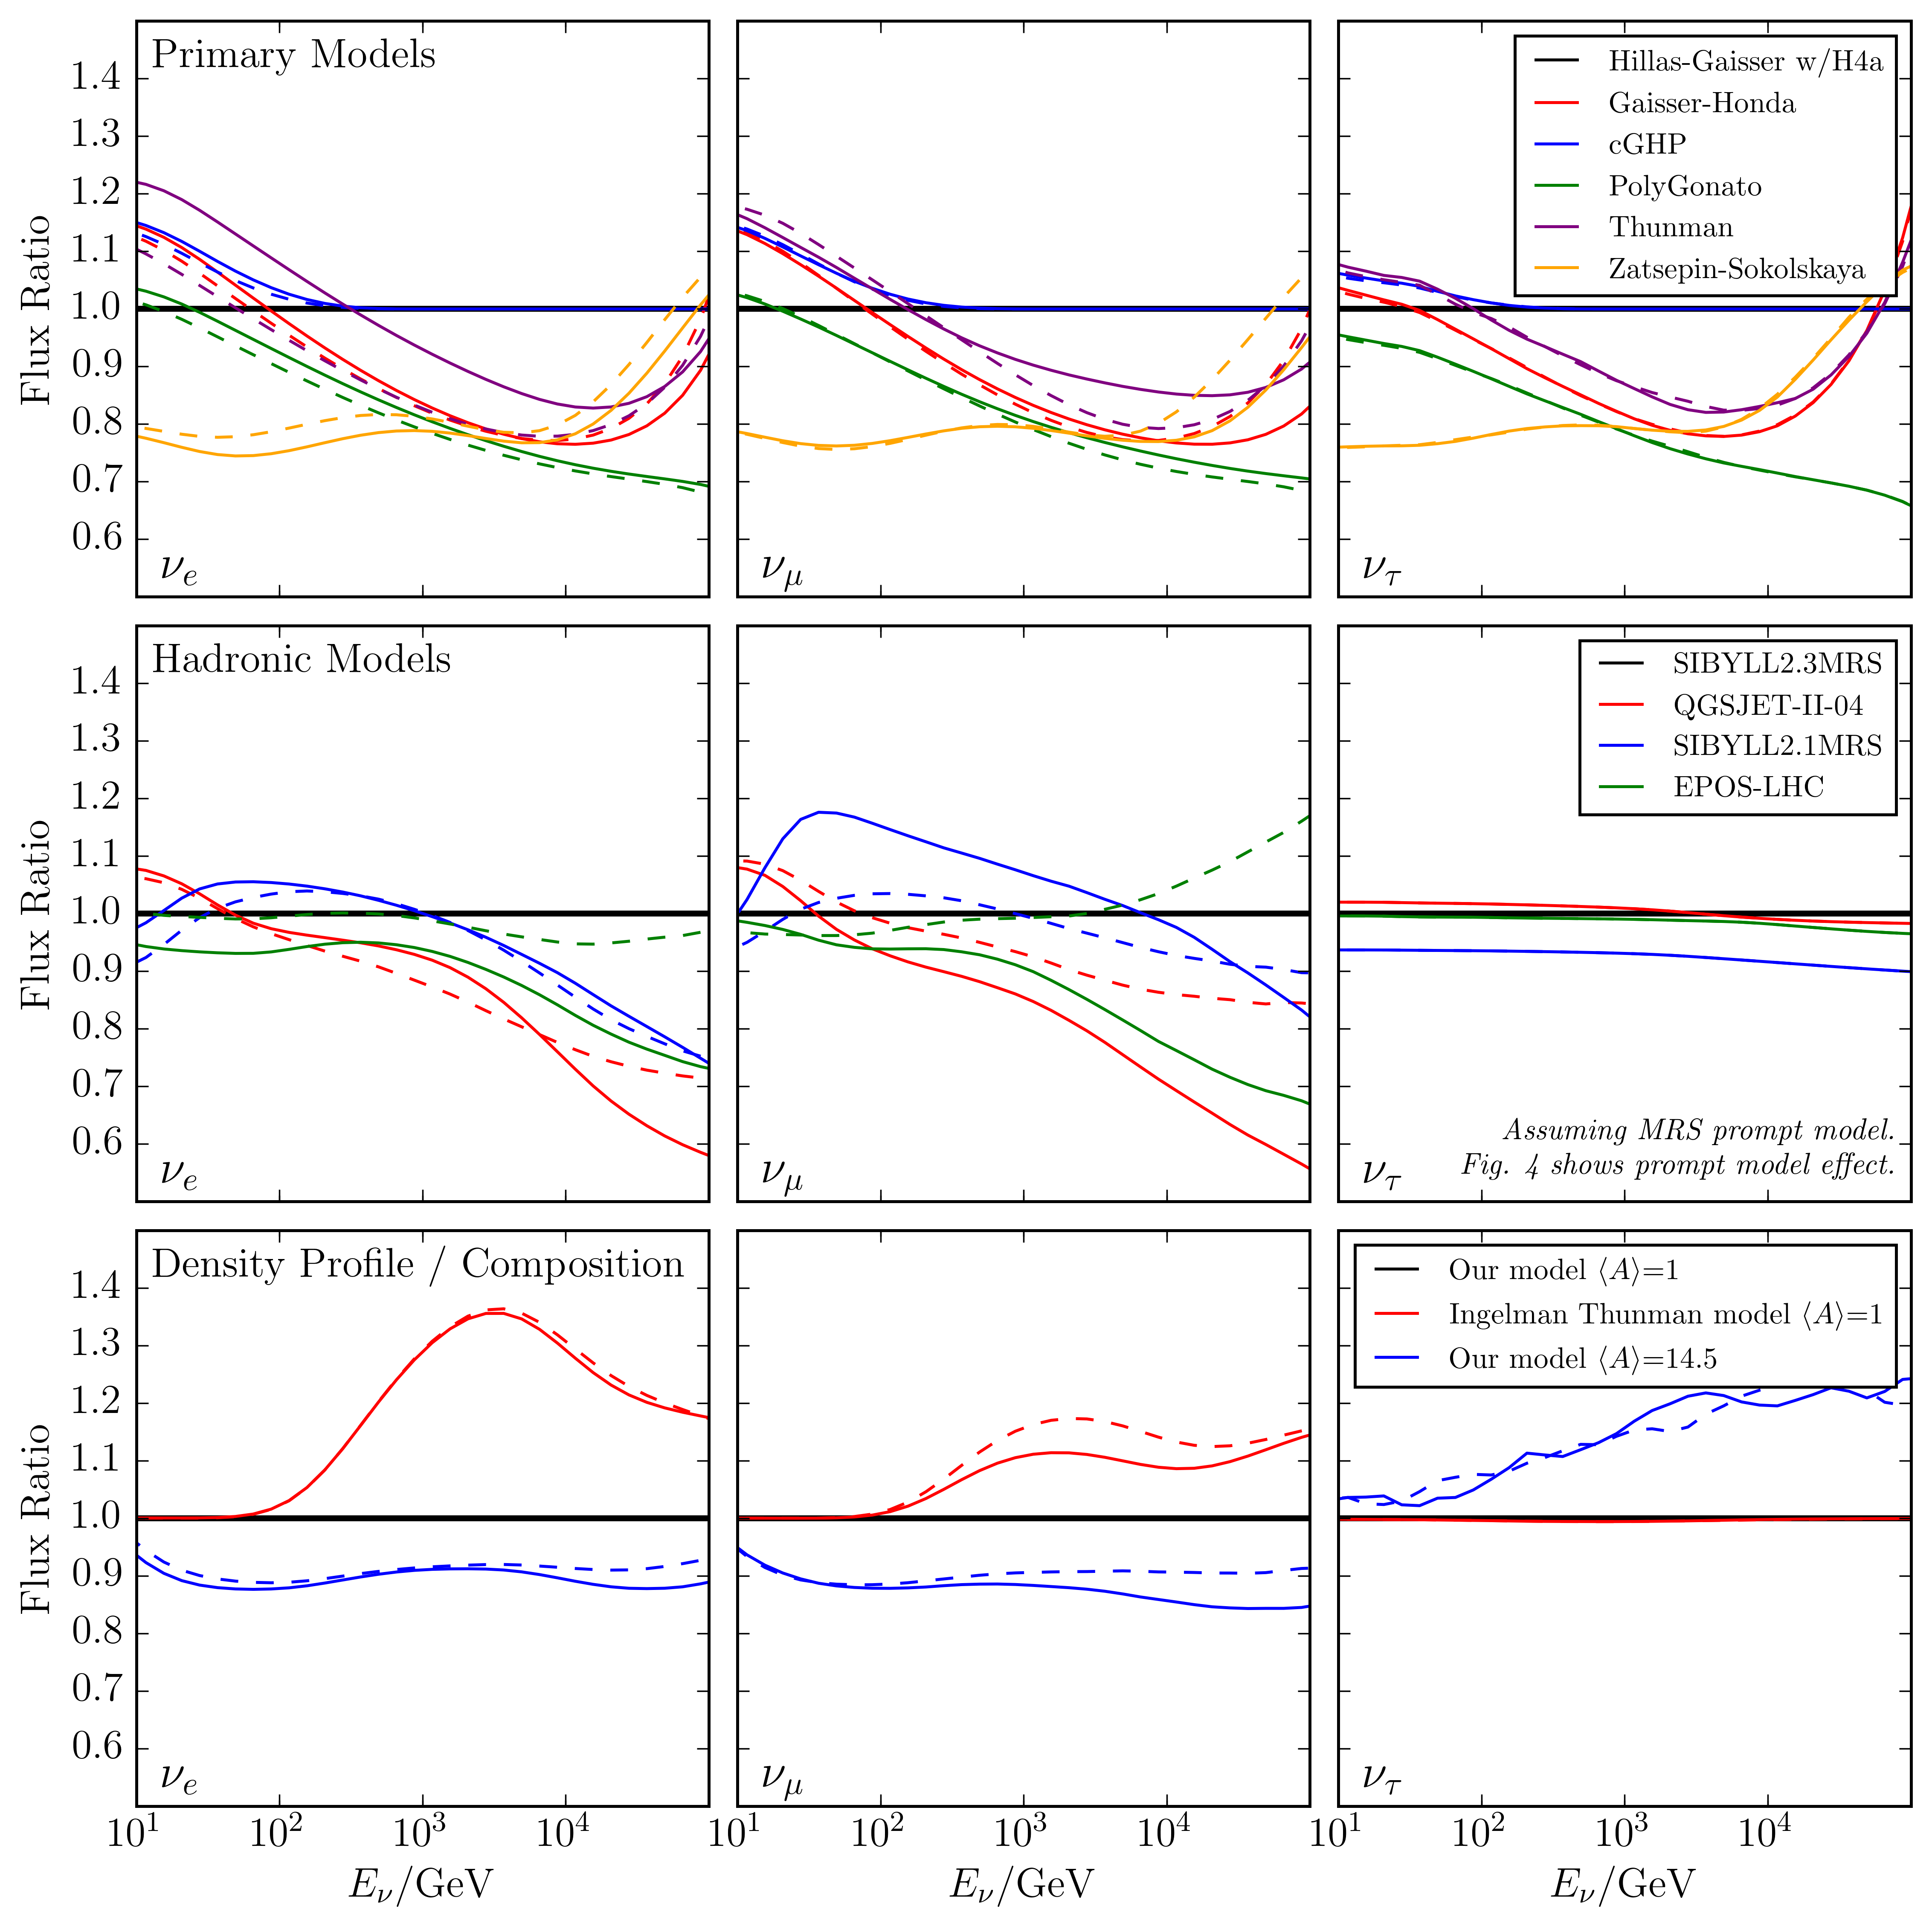

In [36]:
    Colors=['black','red','blue','green','purple','orange']
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    EArray=numpy.loadtxt('/Users/jonesb/Documents/Work/SolarAtmosphere/Outputs/HybridModelShorter_SIBYLL2.3_pp_HillasGaisser_H4a/flux_0.1_b0.1000_E.txt')
    EGrid=EArray[0]
    f, axes = pylab.subplots(3,3,  sharey=True, sharex=True,figsize=(9,9))
    
    LabelGuy=r'$\nu$ (solid) and $\bar \nu$ (dashed)'
    FancyNames=[r"$\nu_e$",r"$\nu_\mu$",r"$\nu_\tau$"]
    neutrinos=['nue','numu','nutau']

    
    for iplot in range(0,3):
        for inu in range(0,3):


            NuType=neutrinos[inu]



            ax=axes[iplot,inu]
            ax.plot(EGrid,numpy.ones_like(EGrid),linewidth=2,color='black')       


            ax.semilogx()
            ax.tick_params(axis='both', which='major', labelsize=14)

            if(iplot==0):
                ax.set_yticks([0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4])
            ax.text(15,0.52,FancyNames[inu],fontsize=16)


            if(iplot==2):
                ax.set_xlabel(r"$E_\nu$/GeV",fontsize=14)
            
            if(inu==0):
                ax.set_ylabel(r"Flux Ratio",fontsize=14)
                if(iplot==0):
                    ax.text(13,1.42,"Primary Models",fontsize=14)
                if(iplot==1):
                    ax.text(13,1.42,"Hadronic Models",fontsize=14)
                if(iplot==2):
                    ax.text(13,1.42,"Density Profile / Composition",fontsize=14)
            FileNames=[]
            Labels=[]
            if(iplot==0):
                FileNames=PrimaryFileNames
                Labels=PrimaryNames
            elif(iplot==1):
                FileNames=HadFileNames
                Labels=HadronicModels
            elif(iplot==2):
                FileNames=AtmFileNames
                Labels=AtmosphereNames

            counter=0
        
            for filename in FileNames:
                EArray=numpy.loadtxt(filename)
                Soln=EArray[NameToID["total_"+NuType]+1]
                if counter==0:
                    DenominatorNu=Soln
                if sum(Soln)>0:
                    ax.semilogx(EGrid, numpy.array(Soln)/numpy.array(DenominatorNu),linestyle='-',color=Colors[counter],label=Labels[counter])
                else:
                    ax.semilogx(EGrid, numpy.ones_like(DenominatorNu),linestyle='-',color=Colors[counter],label=Labels[counter])
                    print "Nothing!"
                Soln=EArray[NameToID["total_anti"+NuType]+1]
                if counter==0:
                    DenominatorNuBar=Soln
                if sum(Soln)>0:
                    ax.semilogx(EGrid, numpy.array(Soln)/numpy.array(DenominatorNuBar),linestyle='--',color=Colors[counter])
                else:
                    ax.semilogx(EGrid, numpy.ones_like(DenominatorNu),linestyle='-',color=Colors[counter])


                counter=counter+1
            if(inu==2 and iplot==1):
                ax.text(8e4,0.62,r"\emph{Assuming MRS prompt model.}",ha='right',va='center')
                ax.text(8e4,0.56,r"\emph{Fig. 4 shows prompt model effect.}",ha='right',va='center')


            if(inu==2):
                ax.legend(loc='upper right',fontsize=10,framealpha=1,ncol=1)

            plt.setp(ax,xticklabels=[r'10$^0$',r'10$^1$',r'10$^2$',r'10$^3$',r'10$^4$'])
            ax.set_ylim(0.5,1.5)
            ax.set_xlim(10,1e5)
            ax.set_xticks([10,100,1000,10000],[10,100,1000,10000])
    plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
    f.subplots_adjust(wspace=0.05)
    f.subplots_adjust(hspace=0.05)

    pylab.savefig("SystematicsPanels.png",bbox_inches=0,dpi=400)
    pylab.show()

In [55]:
    PrimaryFileNames=[]
    PrimaryModels=["HillasGaisser_H4a","CombinedGHAndHG_H4a","GaisserHonda","Thunman","ZatsepinSokolskaya","PolyGonato"]
    for prim in PrimaryModels:
        PrimaryFileNames.append("../OutputsCorrected/HybridModelShorter_SIBYLL2.3_pp_"+prim+"/flux_0.0_b0.0000_E.txt")


    IDToName,NameToID=MCEqRunF.MakeNameDicts()

    RatiosPrimaryNu=[]
    RatiosPrimaryNuBar=[]
    RatiosHadNu=[]
    RatiosHadNuBar=[]
    RatiosPromptNu=[]
    RatiosPromptNuBar=[]
    
    for inu in range(0,3):


        NuType=neutrinos[inu]

        RatiosPrimaryThisNu=[]
        RatiosPrimaryThisNuBar=[]

        count=0
        for filename in PrimaryFileNames:
            EArray=numpy.loadtxt(filename)
            SolnNu=EArray[NameToID["total_"+NuType]+1]
            SolnAntiNu=EArray[NameToID["total_anti"+NuType]+1]
            if(count==0):
                DenominatorNu=SolnNu
                DenominatorAntiNu=SolnAntiNu
            RatiosPrimaryThisNu.append(SolnNu/DenominatorNu)
            RatiosPrimaryThisNuBar.append(SolnAntiNu/DenominatorAntiNu)
            count=count+1

        RatiosPromptThisNu=[]
        RatiosPromptThisNuBar=[]

        count=0
        for filename in PromptFileNames:
            EArray=numpy.loadtxt(filename)
            SolnNu=EArray[NameToID["total_"+NuType]+1]
            SolnAntiNu=EArray[NameToID["total_anti"+NuType]+1]
            if(count==0):
                DenominatorNu=SolnNu
                DenominatorAntiNu=SolnAntiNu
            RatiosPromptThisNu.append(SolnNu/DenominatorNu)
            RatiosPromptThisNuBar.append(SolnAntiNu/DenominatorAntiNu)
            count=count+1

              
        RatiosHadThisNu=[]
        RatiosHadThisNuBar=[]

        count=0
        for filename in HadFileNames:
            EArray=numpy.loadtxt(filename)
            SolnNu=EArray[NameToID["total_"+NuType]+1]
            SolnAntiNu=EArray[NameToID["total_anti"+NuType]+1]
            if(count==0):
                DenominatorNu=SolnNu
                DenominatorAntiNu=SolnAntiNu
            RatiosHadThisNu.append(SolnNu/DenominatorNu)
            RatiosHadThisNuBar.append(SolnAntiNu/DenominatorAntiNu)
            count=count+1        
        RatiosHadNu.append(RatiosHadThisNu)
        RatiosHadNuBar.append(RatiosHadThisNuBar)
        RatiosPrimaryNu.append(RatiosPrimaryThisNu)
        RatiosPrimaryNuBar.append(RatiosPrimaryThisNuBar)        
        RatiosPromptNu.append(RatiosPromptThisNu)
        RatiosPromptNuBar.append(RatiosPromptThisNuBar)        


    RatiosHadNu=numpy.array(RatiosHadNu)
    RatiosHadNuBar=numpy.array(RatiosHadNuBar)
    RatiosPrimaryNu=numpy.array(RatiosPrimaryNu)
    RatiosPrimaryNuBar=numpy.array(RatiosPrimaryNuBar)
    RatiosPromptNu=numpy.array(RatiosPromptNu)
    RatiosPromptNuBar=numpy.array(RatiosPromptNuBar)

    

/Users/jonesb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in divide
/Users/jonesb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:64: RuntimeWarning: invalid value encountered in divide


In [56]:
Colors=['red','blue','green']

MaxRatioHadNus=[]
MinRatioHadNus=[]
MaxRatioPrimNus=[]
MinRatioPrimNus=[]
MaxRatioPromptNus=[]
MinRatioPromptNus=[]
MaxRatioHadNuBars=[]
MinRatioHadNuBars=[]
MaxRatioPrimNuBars=[]
MinRatioPrimNuBars=[]
MaxRatioPromptNuBars=[]
MinRatioPromptNuBars=[]
for nu in range(0,3):
    MaxRatioHadNu=[]
    MinRatioHadNu=[]
    MaxRatioPrimNu=[]
    MinRatioPrimNu=[]
    MaxRatioPromptNu=[]
    MinRatioPromptNu=[]
    MaxRatioHadNuBar=[]
    MinRatioHadNuBar=[]
    MaxRatioPrimNuBar=[]
    MinRatioPrimNuBar=[]
    MaxRatioPromptNuBar=[]
    MinRatioPromptNuBar=[]
    for i in range(0,len(RatiosHadNu[nu][0])):
        MinRatioHadNu.append(numpy.min(RatiosHadNu[nu][:,i]))
        MaxRatioHadNu.append(numpy.max(RatiosHadNu[nu][:,i]))
        MinRatioHadNuBar.append(numpy.min(RatiosHadNuBar[nu][:,i]))
        MaxRatioHadNuBar.append(numpy.max(RatiosHadNuBar[nu][:,i]))
        MinRatioPrimNu.append(numpy.min(RatiosPrimaryNu[nu][:,i]))
        MaxRatioPrimNu.append(numpy.max(RatiosPrimaryNu[nu][:,i]))
        MinRatioPrimNuBar.append(numpy.min(RatiosPrimaryNuBar[nu][:,i]))
        MaxRatioPrimNuBar.append(numpy.max(RatiosPrimaryNuBar[nu][:,i]))
        MinRatioPromptNu.append(numpy.min(RatiosPromptNu[nu][:,i]))
        MaxRatioPromptNu.append(numpy.max(RatiosPromptNu[nu][:,i]))
        MinRatioPromptNuBar.append(numpy.min(RatiosPromptNuBar[nu][:,i]))
        MaxRatioPromptNuBar.append(numpy.max(RatiosPromptNuBar[nu][:,i]))
    MaxRatioHadNus.append(numpy.array(MaxRatioHadNu))
    MinRatioHadNus.append(numpy.array(MinRatioHadNu))
    MaxRatioPrimNus.append(numpy.array(MaxRatioPrimNu))
    MinRatioPrimNus.append(numpy.array(MinRatioPrimNu))
    MaxRatioPromptNus.append(numpy.array(MaxRatioPromptNu))
    MinRatioPromptNus.append(numpy.array(MinRatioPromptNu))
    MaxRatioHadNuBars.append(numpy.array(MaxRatioHadNuBar))
    MinRatioHadNuBars.append(numpy.array(MinRatioHadNuBar))
    MaxRatioPrimNuBars.append(numpy.array(MaxRatioPrimNuBar))
    MinRatioPrimNuBars.append(numpy.array(MinRatioPrimNuBar))
    MaxRatioPromptNuBars.append(numpy.array(MaxRatioPromptNuBar))
    MinRatioPromptNuBars.append(numpy.array(MinRatioPromptNuBar))


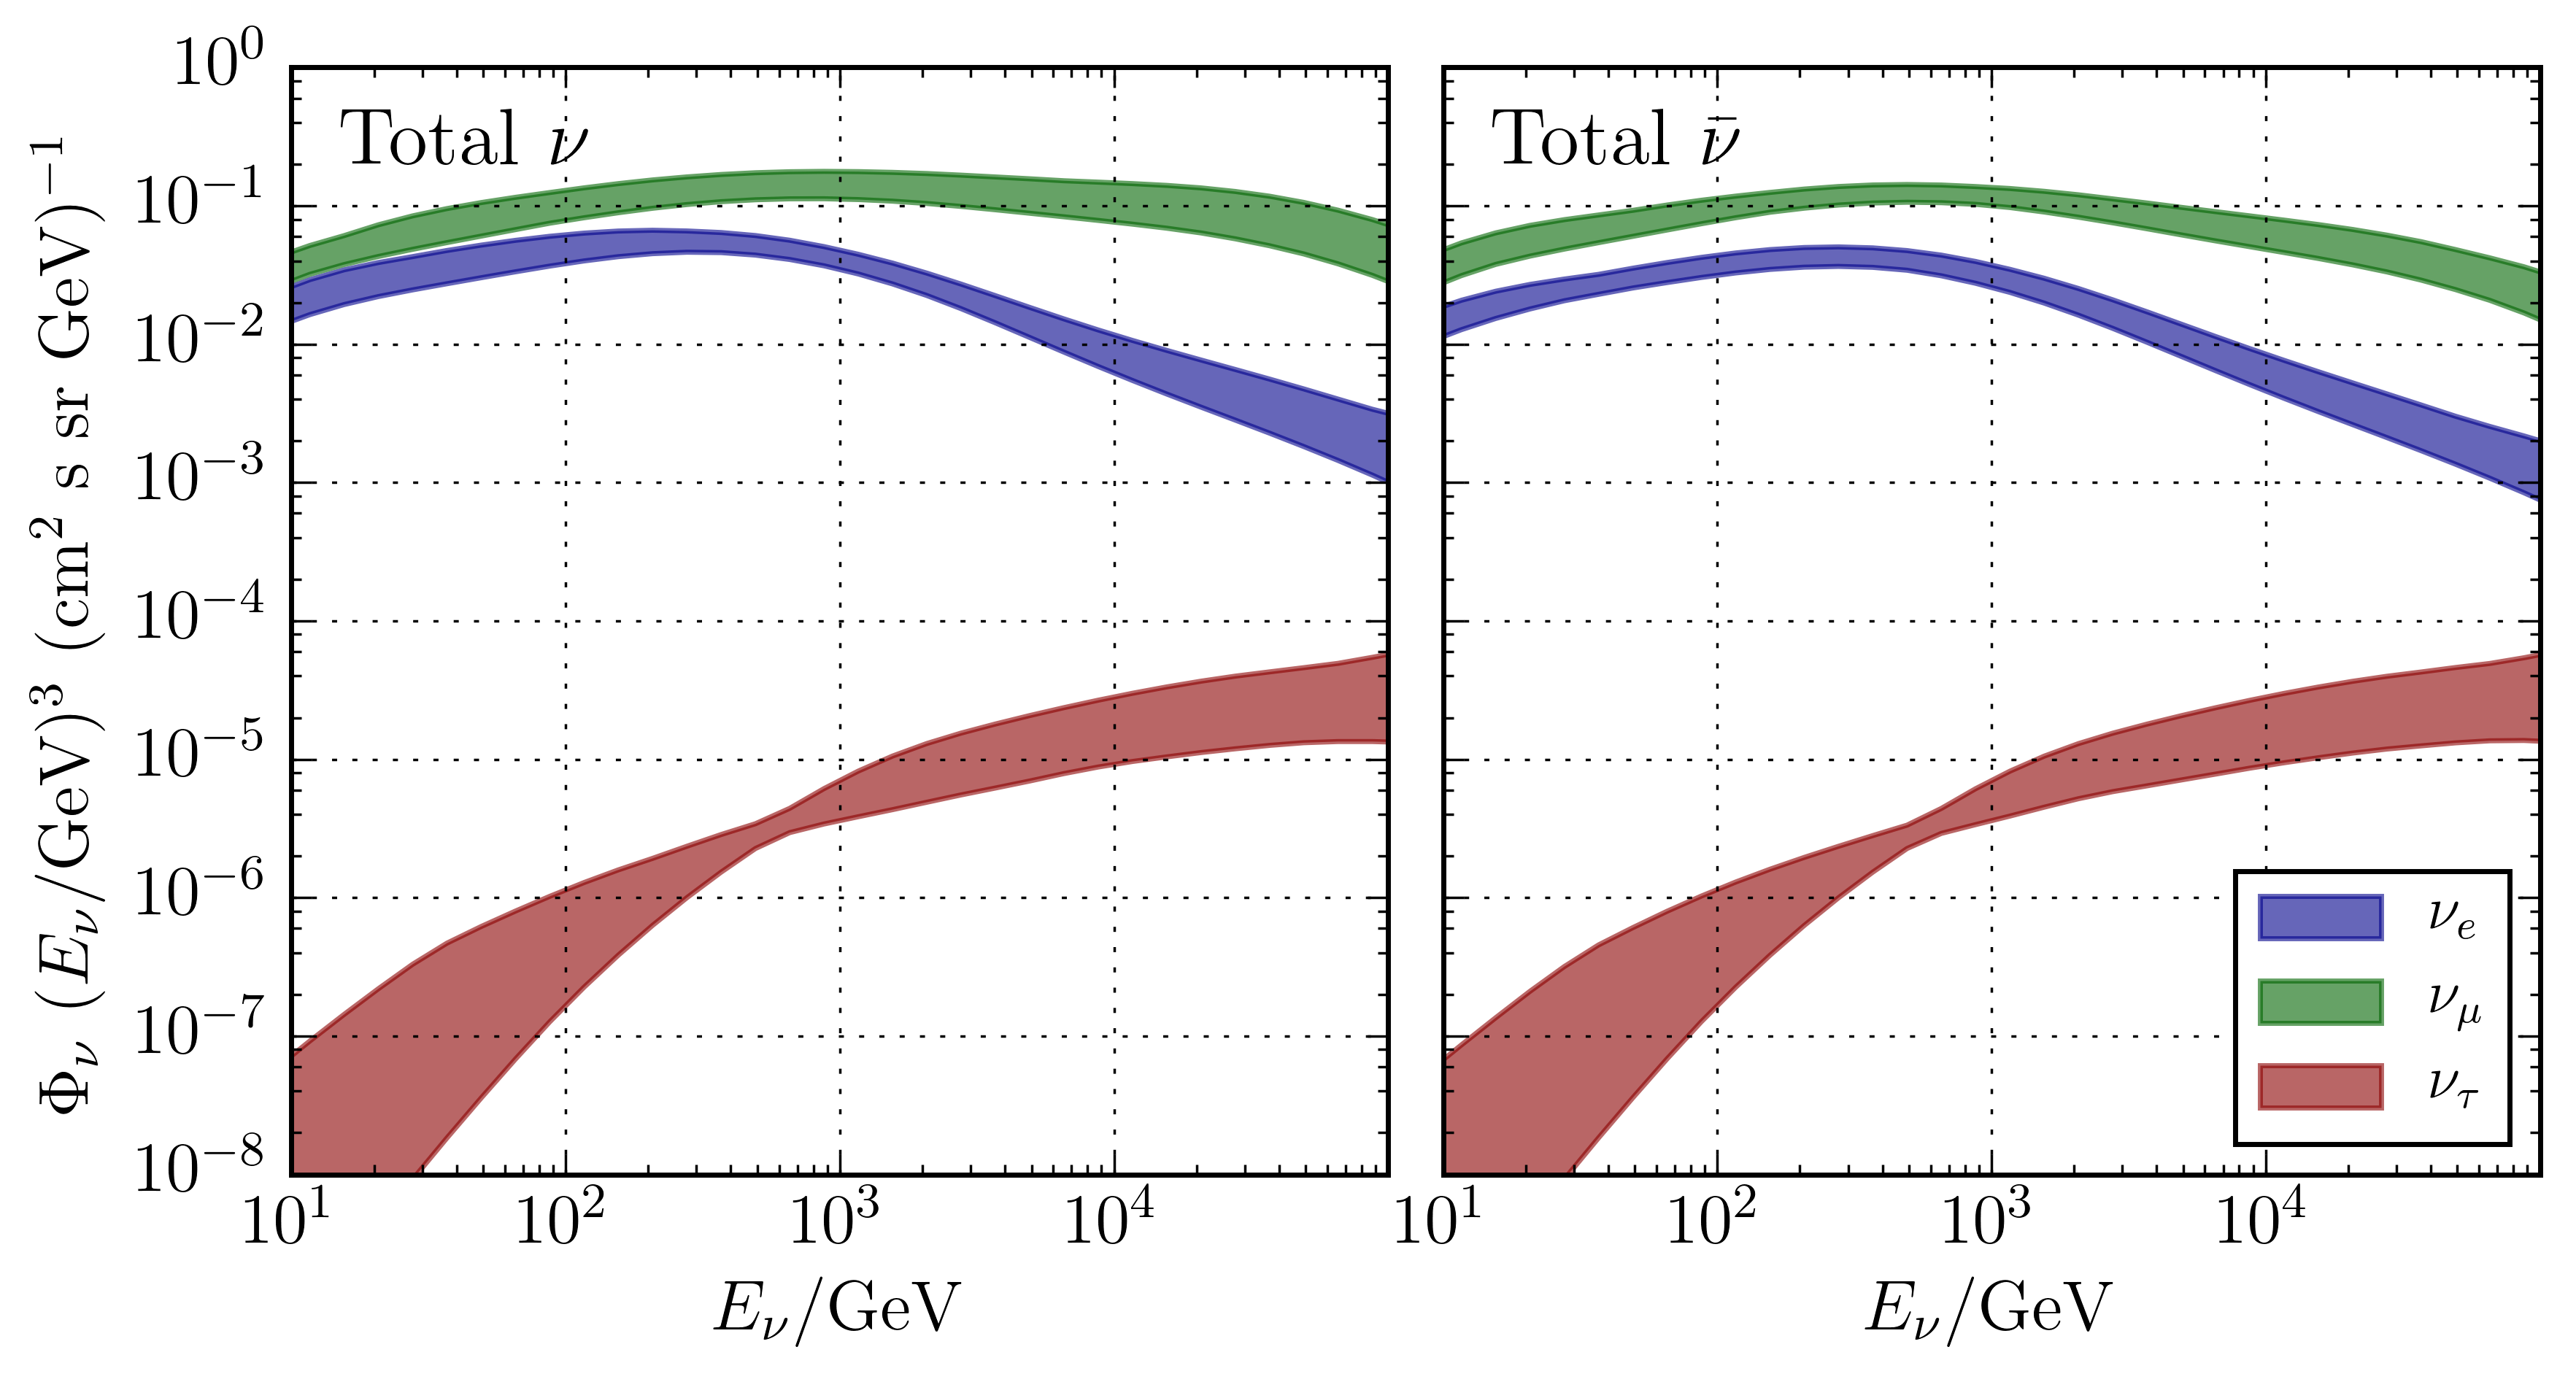

In [57]:
    CentralFile="../OutputsCorrected/HybridModelShorter_SIBYLL2.3_pp_HillasGaisser_H4a/flux_0.0_b0.0000_E.txt"
    mag=3.
    initialmag=2.
    mag=float(mag)-initialmag
    IDToName,NameToID=MCEqRunF.MakeNameDicts()

    f, (ax1, ax2) = pylab.subplots(1,2,  sharey=True,figsize=(7,3.75))
    Colors=['darkblue','darkgreen','darkred']
    LabelGuy=r'$\nu$ (solid) and $\bar \nu$ (dashed)'
    FancyNames=[r"$\nu_e$",r"$\nu_\mu$",r"$\nu_\tau$"]
    neutrinos=['nue','numu','nutau']
    linestyles=['-','--',':']
    MinLimsNu=[]
    MaxLimsNu=[]
    MinLimsNuBar=[]
    MaxLimsNuBar=[]
    for nu in range(0,3):
        count=0
        EArray=numpy.loadtxt(CentralFile)
        EGrid=EArray[0]
        dummy=numpy.ones_like(EGrid)*100

        NuType=neutrinos[nu]
        ax=axes[nu]

        CenterNu=EArray[NameToID["total_"+NuType]+1]*pow(EGrid,mag)
        CenterNuBar=EArray[NameToID["total_anti"+NuType]+1]*pow(EGrid,mag)
        MinLimNu=MinRatioHadNus[nu]*MinRatioPrimNus[nu]*MinRatioPromptNus[nu]*(EGrid<1e6)
        MaxLimNu=MaxRatioHadNus[nu]*MaxRatioPrimNus[nu]*MaxRatioPromptNus[nu]*(EGrid<1e6)
        MinLimNuBar=MinRatioHadNuBars[nu]*MinRatioPrimNuBars[nu]*MinRatioPromptNuBars[nu]*(EGrid<1e6)
        MaxLimNuBar=MaxRatioHadNuBars[nu]*MaxRatioPrimNuBars[nu]*MaxRatioPromptNuBars[nu]*(EGrid<1e6)

        ax1.loglog()
        ax2.loglog()
    
        
#        ax1.loglog(EGrid, CenterNu,linestyle=linestyles[nu],color=Colors[nu])
        ax1.fill_between(EGrid[0:44],(MinLimNu*CenterNu)[0:44],(MaxLimNu*CenterNu)[0:44],color=Colors[nu],alpha=0.6,label=FancyNames[nu])

#        ax2.loglog(EGrid, CenterNuBar,linestyle=linestyles[nu],color=Colors[nu])
        ax2.fill_between(EGrid[0:44],(MinLimNuBar*CenterNuBar)[0:44],(MaxLimNuBar*CenterNuBar)[0:44],color=Colors[nu],alpha=0.6,label=FancyNames[nu])
        MinLimsNu.append(MinLimNu)
        MaxLimsNu.append(MaxLimNu)
        MinLimsNuBar.append(MinLimNuBar)
        MaxLimsNuBar.append(MaxLimNuBar)
        numpy.savetxt("PrePropagated"+str(nu)+".dat",[EGrid,CenterNu,MinLimNu,MaxLimNu,CenterNuBar,MinLimNuBar,MaxLimNuBar])
    ax1.set_ylim(1e-8,1e0)
    ax2.set_ylim(1e-8,1e0)


    ax2.set_xlim(10,1e5)
    ax1.set_xlim(10,1e5)



    ax1.set_xlabel(r"$E_\nu$/GeV",fontsize=14)
    ax2.set_xlabel(r"$E_\nu$/GeV",fontsize=14)

    ax1.text(15,2e-1,r"Total $\nu$",fontsize=16)
    ax2.text(15,2e-1,r"Total $\bar\nu$",fontsize=16)

    ax1.set_ylabel(r"$\Phi_{\nu}$ ($E_\nu$/GeV)$^3$ (cm$^{2}$ s sr GeV)$^{-1}$",fontsize=14)
    ax1.set_xticks([10,100,1000,10000])
    ax2.set_xticks([10,100,1000,10000])
    ax2.legend(loc='lower right')
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    ax1.grid()
    ax2.grid()
    plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=0.5)
    f.subplots_adjust(wspace=0.05)
    pylab.savefig("FluxBands.png",bbox_inches=0,dpi=400)

    pylab.show()
    

In [58]:
MinLimsNu[1]

array([ 0.80950706,  0.80824881,  0.79894424,  0.76893789,  0.74941878,
        0.74300225,  0.75129374,  0.77182328,  0.77147232,  0.76087536,
        0.74959883,  0.73820278,  0.72754526,  0.72054191,  0.71833482,
        0.71946257,  0.71468901,  0.71168178,  0.71002175,  0.70872039,
        0.70623386,  0.70132876,  0.69372447,  0.6843193 ,  0.67163319,
        0.65622253,  0.63881057,  0.6182241 ,  0.59637939,  0.57412286,
        0.55254354,  0.53173545,  0.51237118,  0.49370209,  0.47577885,
        0.45813248,  0.4419717 ,  0.42772362,  0.41338611,  0.39921606,
        0.38431589,  0.36837233,  0.35310284,  0.33630312,  0.31842465,
        0.29689634,  0.27203868,  0.25016117,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [41]:
def MakeMuPlots(FileName,mag=3):
    initialmag=2.
    mag=float(mag)-initialmag
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    
    FileNameE=FileName+str("_E.txt")
    FileNameX=FileName+str("_X.txt")

    EArray=numpy.loadtxt(FileNameE)
    XArray=numpy.loadtxt(FileNameX)
    
    EGrid=EArray[0]
    XGrid=XArray[1]/(100.*1000.) #convert to m
    
    pylab.figure(figsize=(5,5))
    TotalSoln=EArray[NameToID["total_mu+"]+1]+EArray[NameToID["total_mu-"]+1]
    pylab.plot(EGrid, TotalSoln*pow(EGrid,mag),label=r'Total',linestyle='-',color='black')

    TotalComponents=numpy.zeros_like(TotalSoln)
    
    Soln=EArray[NameToID["pi_mu+"]+1]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(EGrid, Soln*pow(EGrid,mag),label=r'from $\pi$',linestyle='-',color='red')
    Soln=EArray[NameToID["pi_mu-"]+1]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(EGrid, Soln*pow(EGrid,mag),linestyle='--',color='red')
    Soln=EArray[NameToID["k_mu+"]+1]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(EGrid, Soln*pow(EGrid,mag),label=r'from $K$',linestyle='-',color='green')
    Soln=EArray[NameToID["k_mu-"]+1]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(EGrid, Soln*pow(EGrid,mag),linestyle='--',color='green')
    Soln=EArray[NameToID["pr_mu+"]+1]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(EGrid, Soln*pow(EGrid,mag),label=r'from prompt',linestyle='-',color='purple')
    Soln=EArray[NameToID["pr_mu-"]+1]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(EGrid, Soln*pow(EGrid,mag),linestyle='--',color='purple')

    pylab.plot(EGrid,(TotalSoln-TotalComponents)*pow(EGrid,mag),color='grey',label='other')
    pylab.xlabel(r"$E_\mu$/GeV")
    plt.ylabel(r"$\Phi_{\mu}$ (E/GeV)$^{" + str(mag+initialmag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
    plt.ylim(1e-6,10)
    plt.xlim(5e1,1e6)
    pylab.loglog()


    pylab.show()
    
    
    pylab.figure(figsize=(8,3))
    TotalSoln=XArray[NameToID["total_mu+"]+2]+XArray[NameToID["total_mu-"]+2]
    pylab.plot(XGrid, TotalSoln,label=r'Total',linestyle='-',color='black')

    TotalComponents=numpy.zeros_like(TotalSoln)

    Soln=XArray[NameToID["pi_mu+"]+2]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(XGrid, Soln,label=r'from $\pi$',linestyle='-',color='red')
    Soln=XArray[NameToID["pi_mu-"]+2]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(XGrid, Soln,linestyle='--',color='red')
    Soln=XArray[NameToID["k_mu+"]+2]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(XGrid, Soln,label=r'from $K$',linestyle='-',color='green')
    Soln=XArray[NameToID["k_mu-"]+2]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(XGrid, Soln,linestyle='--',color='green')
    Soln=XArray[NameToID["pr_mu+"]+2]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(XGrid, Soln,label=r'from prompt',linestyle='-',color='purple')
    Soln=XArray[NameToID["pr_mu-"]+2]
    TotalComponents+=Soln
    if sum(Soln)>0:
        pylab.plot(XGrid, Soln,linestyle='--',color='purple')

    pylab.plot(XGrid,TotalSoln-TotalComponents,color='grey',label='other')

    pylab.legend(loc='upper left',title=r"$\mu^+$ (solid) and $\mu^-$ (dashed)")
    pylab.loglog()
  #  pylab.xlim(1e2,1e4)
    pylab.ylim(1e-13,1e-2)
    pylab.xlabel(r"$X_\nu$/km")
    plt.ylabel(r"$\Phi_{\mu}$ (cm$^{2}$ s sr GeV)$^{-1}$")
    pylab.show()
    
    

In [42]:
def CompareSimRuns(FileNames,Origin,NuType,mag=3,Labels=["GH&HG H3a","GH&HG H4a","GaisserHonda","HillasGaisser_H3a","HillasGaisser_H4a","PolyGonato","Thunman"]):
    Colors=['red','green','blue','grey','darkred','darkgreen','darkblue','purple']
    initialmag=2.
    mag=float(mag)-initialmag
    pylab.figure(figsize=(5,5))
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    
    if NuType=='numu':
        LabelGuy=r'$\nu_\mu$ (solid) and $\bar \nu_\mu $ (dashed)'
    elif NuType=='nue':
        LabelGuy=r'$\nu_e$ (solid) and $\bar \nu_e$ (dashed)'
    elif NuType=='nutau':
        LabelGuy=r'$\nu_\tau$ (solid) and $\bar \nu_\tau$ (dashed)'
    counter=0
    for FileName in FileNames:
        
        FileNameE=FileName+str("_E.txt")
        EArray=numpy.loadtxt(FileNameE)
    
        EGrid=EArray[0]
        
        Soln=EArray[NameToID[Origin+"_"+NuType]+1]
        if sum(Soln)>0:
            pylab.loglog(EGrid, Soln*pow(EGrid,mag),label=Labels[counter],linestyle='-',color=Colors[counter])
        Soln=EArray[NameToID[Origin+"_anti"+NuType]+1]
        if sum(Soln)>0:
            pylab.loglog(EGrid, Soln*pow(EGrid,mag),linestyle='--',color=Colors[counter])

        counter=counter+1

    
    pylab.legend(loc='lower left',title=LabelGuy,fontsize=10)
    pylab.xlabel(r"$E_\nu$/GeV")
    plt.ylabel(r"$\Phi_{\nu_{\tau}}$ (E/GeV)$^{" + str(mag+initialmag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
    plt.title("Production from "+Origin)
    plt.ylim(1e-3,0.2)
#    plt.xlim(1e2,1e6)
    pylab.show()
    
    




In [43]:
def MakeChargeRatio(FileName):
    pylab.figure(figsize=(5,5))
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    
    FileNameE=FileName+str("_E.txt")
    EArray=numpy.loadtxt(FileNameE)
    
    EGrid=EArray[0]
        
    Soln1=EArray[NameToID["total_numu"]+1]
    Soln2=EArray[NameToID["total_antinumu"]+1]
    if sum(Soln1)>0 and sum(Soln2)>0:
        pylab.semilogx(EGrid, Soln1/Soln2,linestyle='-',color='blue',label=r'$\nu_\mu$ / $\bar \nu_\mu$')

        
    Soln1=EArray[NameToID["total_nue"]+1]
    Soln2=EArray[NameToID["total_antinue"]+1]
    if sum(Soln1)>0 and sum(Soln2)>0:
        pylab.semilogx(EGrid, Soln1/Soln2,linestyle='-',color='red',label=r'$\nu_e$ / $\bar \nu_e$')


    Soln1=EArray[NameToID["total_nutau"]+1]
    Soln2=EArray[NameToID["total_antinutau"]+1]
    if sum(Soln1)>0 and sum(Soln2)>0:
        pylab.semilogx(EGrid, Soln1/Soln2,linestyle='-',color='green',label=r'$\nu_\tau$ / $\bar \nu_\tau$')

    Soln1=EArray[NameToID["total_mu-"]+1]
    Soln2=EArray[NameToID["total_mu+"]+1]
    if sum(Soln1)>0 and sum(Soln2)>0:
        pylab.semilogx(EGrid, Soln1/Soln2,linestyle='-',color='purple',label=r'$\mu^-$ / $\mu^+$')


        
        
    pylab.legend(loc='lower left',fontsize=10)
    pylab.xlabel(r"$E_\nu$/GeV")
    plt.ylabel(r"Flux Ratio")
    plt.ylim(0.9,1.1)
    plt.xlim(1e2,1e6)
    pylab.show()
    
    



In [44]:
def CompareSimRuns(FileNames,Origin,NuType,mag=3,Labels=["1","2","3","4"],XOffsets=[100,1000,5000,12388]):
    Colors=['red','green','blue','orange','grey','pink','darkred','darkgreen','darkblue','purple']
    initialmag=2.
    mag=float(mag)-initialmag
    pylab.figure(figsize=(5,5))
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    
    if NuType=='numu':
        LabelGuy=r'$\nu_\mu$ (solid) and $\bar \nu_\mu $ (dashed)'
    elif NuType=='nue':
        LabelGuy=r'$\nu_e$ (solid) and $\bar \nu_e$ (dashed)'
    elif NuType=='nutau':
        LabelGuy=r'$\nu_\tau$ (solid) and $\bar \nu_\tau$ (dashed)'
    counter=0
    for FileName in FileNames:
        
        FileNameE=FileName+str("_E.txt")
        EArray=numpy.loadtxt(FileNameE)
    
        EGrid=EArray[0]
        
        Soln=EArray[NameToID[Origin+"_"+NuType]+1]
        if sum(Soln)>0:
            pylab.loglog(EGrid, Soln*pow(EGrid,mag),label=Labels[counter],linestyle='-',color=Colors[counter])
        Soln=EArray[NameToID[Origin+"_anti"+NuType]+1]
        if sum(Soln)>0:
            pylab.loglog(EGrid, Soln*pow(EGrid,mag),linestyle='--',color=Colors[counter])

        counter=counter+1
    
    pylab.legend(loc='lower left',title=LabelGuy,fontsize=10)
    pylab.xlabel(r"$E_\nu$/GeV")
    plt.ylabel(r"$\Phi_{\nu_{\tau}}$ (E/GeV)$^{" + str(mag+initialmag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
    plt.title("Production from "+Origin)
    plt.ylim(1e-6,1e-1)
    plt.xlim(1e2,1e8)
    pylab.show()
    
    


In [45]:
def MakeIngelThurmanPlots(FileName,NuType='',mag=3):
    initialmag=2.
    mag=float(mag)-initialmag
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    
    FileNameE=FileName+str("_E.txt")
    FileNameX=FileName+str("_X.txt")

    EArray=numpy.loadtxt(FileNameE)
    XArray=numpy.loadtxt(FileNameX)
    
    EGrid=EArray[0]
    XGrid=XArray[0]
    
    pylab.figure(figsize=(5,5))
    if NuType=='numu':
        LabelGuy=r'$\nu_\mu$ (solid) and $\bar \nu_\mu $ (dashed)'
    elif NuType=='nue':
        LabelGuy=r'$\nu_e$ (solid) and $\bar \nu_e$ (dashed)'
    elif NuType=='nutau':
        LabelGuy=r'$\nu_\tau$ (solid) and $\bar \nu_\tau$ (dashed)'
    Soln=EArray[NameToID["total_"+NuType]+1]+EArray[NameToID["total_anti"+NuType]+1]
    pylab.loglog(EGrid, Soln*pow(EGrid,mag),label=r'Total',linestyle='-',color='orange',linewidth=2)


    Soln=EArray[NameToID["pi_"+NuType]+1]+EArray[NameToID["pi_anti"+NuType]+1]
    if sum(Soln)>0:
        pylab.loglog(EGrid, Soln*pow(EGrid,mag),label=r'from $\pi$',linestyle='-',color='red')

    Soln=EArray[NameToID["k_"+NuType]+1]+EArray[NameToID["k_anti"+NuType]+1]
    if sum(Soln)>0:
        pylab.loglog(EGrid, Soln*pow(EGrid,mag),label=r'from $K$',linestyle='--',color='green')
    Soln=EArray[NameToID["obs_"+NuType]+1]+EArray[NameToID["obs_anti"+NuType]+1]
    if sum(Soln)>0:
        pylab.loglog(EGrid, Soln*pow(EGrid,mag),label=r'from $\mu$',linestyle='-',color='blue')

    Soln=EArray[NameToID["pr_"+NuType]+1]+EArray[NameToID["pr_anti"+NuType]+1]
    if sum(Soln)>0:
        pylab.loglog(EGrid, Soln*pow(EGrid,mag),label=r'from prompt',linestyle='-',color='purple')
    pylab.legend(loc='upper right',title=LabelGuy,fontsize=10)
    pylab.xlabel(r"$E_\nu$/GeV")
    plt.ylabel(r"$\Phi_{\nu_{\tau}}$ (E/GeV)$^{" + str(mag+initialmag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$")
    plt.ylim(2e-4,2)
    plt.xlim(100,1e8)
    pylab.show()

In [46]:
cmap = plt.get_cmap('gist_heat')


cmap(numpy.linspace(0,1,10))

array([[ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.16470588,  0.        ,  0.        ,  1.        ],
       [ 0.32941176,  0.        ,  0.        ,  1.        ],
       [ 0.5       ,  0.        ,  0.        ,  1.        ],
       [ 0.66470588,  0.        ,  0.        ,  1.        ],
       [ 0.83529412,  0.11372549,  0.        ,  1.        ],
       [ 1.        ,  0.33333333,  0.        ,  1.        ],
       [ 1.        ,  0.56078431,  0.12156863,  1.        ],
       [ 1.        ,  0.78039216,  0.56078431,  1.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ]])

In [47]:
def CompareSimRunsRatio(FileNames,Origin,NuType,Name="$\pi$",ylims=[0.8,1.8],colmap='gist_heat',labels=None):
    cmap = plt.get_cmap(colmap)
    Colors=cmap(numpy.linspace(0,0.9,len(FileNames)))
    if labels==None:
        TheLabels=numpy.zeros_like(FileNames)
    else:
        TheLabels=labels
    initialmag=2.
    pylab.figure(figsize=(5,5))
    IDToName,NameToID=MCEqRunF.MakeNameDicts()

    counter=0
    if NuType=='mu':
        NuType='mu-'
        AntiNuType='_mu+'
    else:
        AntiNuType="_anti"+NuType

    for FileName in FileNames:
        
        
        FileNameE=FileName+str("_E.txt")
        EArray=numpy.loadtxt(FileNameE)
    
        EGrid=EArray[0]
        
        Soln=EArray[NameToID[Origin+"_"+NuType]+1]
        if counter==0:
            DenominatorNu=Soln
        if sum(Soln)>0:
            pylab.semilogx(EGrid, numpy.array(Soln)/numpy.array(DenominatorNu),linestyle='-',color=Colors[counter],label=TheLabels[counter])
        Soln=EArray[NameToID[Origin+AntiNuType]+1]
        if counter==0:
            DenominatorNuBar=Soln
        if sum(Soln)>0:
            pylab.semilogx(EGrid, numpy.array(Soln)/numpy.array(DenominatorNuBar),linestyle='--',color=Colors[counter])


        counter=counter+1
       
  
 
  #pylab.legend(title="Impact parameter:", bbox_to_anchor=(0., 1.02, 1., .102),loc=3, ncol=10, mode="expand", borderaxespad=0., fontsize=6)
    pylab.xlabel(r"$E_\nu$/GeV")
    plt.ylabel(r"Flux Ratio")
    plt.title(Name)
    plt.ylim(ylims[0],ylims[1])
    plt.xlim(10,1e5)
    if labels!=None:
        pylab.legend(loc='upper left',fontsize=10)
    pylab.show()
    
    


In [48]:
FileNames=[]
for i in range(0,9):
    String="../Outputs/HybridModel_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0."+str(i)+"_b0."+str(i)+"000"
    FileNames.append(String)
    
CompareSimRunsRatio(FileNames,"total","numu",r"$\nu_\mu$ (solid) and $\bar{\nu}_\mu$ (dashed) production",[0.95,1.4])
CompareSimRunsRatio(FileNames,"total","nue",r"$\nu_e$ (solid) and $\bar{\nu}_e$ (dashed) production",[0.95,1.4])
CompareSimRunsRatio(FileNames,"total","nutau",r"$\nu_\tau$ (solid) and $\bar{\nu}_\tau$ (dashed) production",[0.98,1.002])
CompareSimRunsRatio(FileNames,"total","mu",r"$\mu^-$ (solid) and $\mu^+$ (dashed) production",[0.94,1.5])






IOError: [Errno 2] No such file or directory: '../Outputs/HybridModel_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000_E.txt'

In [ ]:
CompareSimRuns(["../OutputsFromGrid/HybridModel_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000","../OutputsFromGrid/IngelmanThurmanAtmosphere_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000"],'total','nue')
CompareSimRuns(["../OutputsFromGrid/HybridModel_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000","../OutputsFromGrid/IngelmanThurmanAtmosphere_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000"],'total','numu')
CompareSimRuns(["../OutputsFromGrid/HybridModel_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000","../OutputsFromGrid/IngelmanThurmanAtmosphere_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000"],'total','nutau')
#CompareSimRuns(["../OutputsFromGrid/HybridModel_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000","../OutputsFromGrid/IngelmanThurmanAtmosphere_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000"],'total','mu')

In [ ]:
PrimaryModels=["CombinedGHAndHG_H3a","HillasGaisser_H3a","GaisserHonda","PolyGonato","Thunman","ZatsepinSokolskaya"]
Atmospheres=["HybridModel","IngelmanThurmanAtmosphere"]
HadronicModels=["SIBYLL2.3","QGSJET-II-03","SIBYLL2.1","EPOS-LHC"]

In [ ]:
#Make systematic plot
cmap = plt.get_cmap(colmap)
Colors=cmap(numpy.linspace(0,0.9,len(FileNames)))
if labels==None:
    TheLabels=numpy.zeros_like(FileNames)
else:
    TheLabels=labels
initialmag=2.
pylab.figure(figsize=(5,5))
IDToName,NameToID=MCEqRunF.MakeNameDicts()
for 
    counter=0
    if NuType=='mu':
        NuType='mu-'
        AntiNuType='_mu+'
    else:
        AntiNuType="_anti"+NuType

    for FileName in FileNames:
        
        
        FileNameE=FileName+str("_E.txt")
        EArray=numpy.loadtxt(FileNameE)
    
        EGrid=EArray[0]
        
        Soln=EArray[NameToID[Origin+"_"+NuType]+1]
        if counter==0:
            DenominatorNu=Soln
        if sum(Soln)>0:
            pylab.semilogx(EGrid, numpy.array(Soln)/numpy.array(DenominatorNu),linestyle='-',color=Colors[counter],label=TheLabels[counter])
        Soln=EArray[NameToID[Origin+AntiNuType]+1]
        if counter==0:
            DenominatorNuBar=Soln
        if sum(Soln)>0:
            pylab.semilogx(EGrid, numpy.array(Soln)/numpy.array(DenominatorNuBar),linestyle='--',color=Colors[counter])


        counter=counter+1
       
  
 
  #pylab.legend(title="Impact parameter:", bbox_to_anchor=(0., 1.02, 1., .102),loc=3, ncol=10, mode="expand", borderaxespad=0., fontsize=6)
    pylab.xlabel(r"$E_\nu$/GeV")
    plt.ylabel(r"Flux Ratio")
    plt.title(Name)
    plt.ylim(ylims[0],ylims[1])
    plt.xlim(10,1e5)
    if labels!=None:
        pylab.legend(loc='upper left',fontsize=10)
    pylab.show()
    

In [ ]:
PrimaryModels=["CombinedGHAndHG_H3a","HillasGaisser_H3a","GaisserHonda","PolyGonato","Thunman","ZatsepinSokolskaya"]
Atmospheres=["HybridModel","IngelmanThurmanAtmosphere"]
HadronicModels=["SIBYLL2.3","QGSJET-II-03","SIBYLL2.1","EPOS-LHC"]

PrimaryFileNames=[]
for prim in PrimaryModels:
    PrimaryFileNames.append("../OutputsFromGrid/HybridModel_SIBYLL2.3_"+prim+"/flux_0.0_b0.0000")
AtmFileNames=[]
for atm in Atmospheres:
    AtmFileNames.append("../OutputsFromGrid/"+atm+"_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000")
HadFileNames=[]
for had in HadronicModels:
    HadFileNames.append("../OutputsFromGrid/HybridModel_"+had+"_CombinedGHAndHG_H3a/flux_0.0_b0.0000")

In [ ]:
CompareSimRunsPrimary(PrimaryFileNames,"total", [0.6,1.1],colmap='nipy_spectral',labels=PrimaryModels)


In [ ]:
CompareSimRunsRatio(AtmFileNames,"total","numu",r"$\nu_\mu$ (solid) and $\bar{\nu}_\mu$ (dashed) production",[0.8,1.2],colmap='nipy_spectral',labels=Atmospheres)
CompareSimRunsRatio(AtmFileNames,"total","nue",r"$\nu_e$ (solid) and $\bar{\nu}_e$ (dashed) production",[0.8,1.2],colmap='nipy_spectral',labels=Atmospheres)
CompareSimRunsRatio(AtmFileNames,"total","nutau",r"$\nu_\tau$ (solid) and $\bar{\nu}_\tau$ (dashed) production",[0.8,1.2],colmap='nipy_spectral',labels=Atmospheres)




In [ ]:
CompareSimRunsRatio(HadFileNames,"total","numu",r"$\nu_\mu$ (solid) and $\bar{\nu}_\mu$ (dashed) production",[0.3,1.5],colmap='nipy_spectral',labels=HadronicModels)
CompareSimRunsRatio(HadFileNames,"total","nue",r"$\nu_e$ (solid) and $\bar{\nu}_e$ (dashed) production",[0.3,1.5],colmap='nipy_spectral',labels=HadronicModels)
CompareSimRunsRatio(HadFileNames,"total","nutau",r"$\nu_\tau$ (solid) and $\bar{\nu}_\tau$ (dashed) production",[0.3,1.5],colmap='nipy_spectral',labels=HadronicModels)




In [ ]:
CompareSimRunsRatio(FileNames,"total","numu",r"$\nu_\mu$ (solid) and $\bar{\nu}_\mu$ (dashed) production",[0.5,2])
CompareSimRunsRatio(FileNames,"total","nue",r"$\nu_e$ (solid) and $\bar{\nu}_e$ (dashed) production",[0.5,2])
CompareSimRunsRatio(FileNames,"total","nutau",r"$\nu_\tau$ (solid) and $\bar{\nu}_\tau$ (dashed) production",[0.5,2])



In [ ]:
MakeMuPlots("../OutputsFromGrid/HybridModel_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000",mag=3)

In [ ]:
CompareSimRuns(FileNames,"total","numu",3)
CompareSimRuns(FileNames,"total","nue",3)
CompareSimRuns(FileNames,"total","nutau",3)



In [ ]:
FileName="../Outputs/IngelmanThurmanAtmosphere_SIBYLL2.3_Thunman/flux_0.0_b0.0000"
MakeIngelThurmanPlots(FileName,"numu",mag=3)
#MakeIngelThurmanPlots(FileName,"nue",mag=3)
#MakeIngelThurmanPlots(FileName,"nutau",mag=3)
FileName="../Outputs/IngelmanThurmanAtmosphere_SIBYLL2.1_Thunman/flux_0.0_b0.0000"
MakeIngelThurmanPlots(FileName,"numu",mag=3)
#MakeIngelThurmanPlots(FileName,"nue",mag=3)
#MakeIngelThurmanPlots(FileName,"nutau",mag=3)


FileName="../Outputs/IngelmanThurmanAtmosphere_QGSJET-II-04_Thunman/flux_0.0_b0.0000"
MakeIngelThurmanPlots(FileName,"numu",mag=3)
#MakeIngelThurmanPlots(FileName,"nue",mag=3)
#MakeIngelThurmanPlots(FileName,"nutau",mag=3)

FileName="../Outputs/IngelmanThurmanAtmosphere_EPOS-LHC_Thunman/flux_0.0_b0.0000"
MakeIngelThurmanPlots(FileName,"numu",mag=3)
#MakeIngelThurmanPlots(FileName,"nue",mag=3)
#MakeIngelThurmanPlots(FileName,"nutau",mag=3)


FileName="../flux_0.0_b0.0000"
MakeIngelThurmanPlots(FileName,"numu",mag=3)

In [ ]:
MakeChargeRatio("../OutputsFromGrid/HybridModel_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.0_b0.0000")
MakeChargeRatio("../OutputsFromGrid/HybridModel_SIBYLL2.3_CombinedGHAndHG_H3a/flux_0.9_b0.9000")

In [ ]:
FileName="../flux_0.0_b0.0000"
MakeIngelThurmanPlots(FileName,"numu",mag=3)

   
  # Prompt plot

In [ ]:
    mag=3
    FileNames=[]
    Origin='pr'
    FileNames.append('../Outputs/HybridModel_SIBYLL2.3_HillasGaisser_H3a/flux_0.0_b0.0000_E.txt')
    FileNames.append('../Outputs/HybridModel_QGSJET-II-03_CombinedGHAndHG_H3a/flux_0.0_b0.0000_E.txt')
    Colors=['red','darkgreen','darkblue']
    initialmag=2.
    mag=float(mag)-initialmag
    pylab.figure(figsize=(4,4))
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    nutypes=['numu','nutau','nue']
    nunames=[r'Prompt $\nu_e+\bar{\nu}_e$',r'Prompt $\nu_\mu+\bar{\nu}_\mu$',r'Prompt $\nu_\tau+\bar{\nu}_\tau$']
    LineStyles=['-',':']
    for i in range(0, 3):
        counter=0
        for FileName in FileNames:
        
            FileNameE=FileName
            EArray=numpy.loadtxt(FileNameE)
    
            EGrid=EArray[0]
        
            Soln=EArray[NameToID[Origin+"_"+nutypes[i]]+1]+EArray[NameToID[Origin+"_anti"+nutypes[i]]+1]
            if(counter==0):
                plt.loglog(EGrid, Soln*pow(EGrid,mag),linestyle=LineStyles[counter],color=Colors[i],linewidth=2,label=nunames[i])
            else:
                plt.loglog(EGrid, Soln*pow(EGrid,mag),linestyle=LineStyles[counter],color=Colors[i],linewidth=2)
            counter=counter+1
    plt.ylim(1e-10,1e-3)
    plt.xlim(10,1e5) 
    plt.legend(loc='lower right',title="Solid: SIBYLL2.3. Dotted: MRS.",fontsize=10)
    plt.xlabel(r"$E_\nu$/GeV",fontsize=12)
    plt.ylabel(r"$\Phi_{\nu+\bar{\nu}}$ (E/GeV)$^3$ (cm$^{2}$ s sr GeV)$^{-1}$",fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    plt.savefig("PromptPlot.png",bbox_inches=0,dpi=400)
    plt.show()
    
    

In [ ]:
    mag=3
    FileNames=[]
    Origin='pr'
    bvals=[0,3,6,9]
    BaseFile='../OutputsCorrected/HybridModel_SIBYLL2.3_CombinedGHAndHG_H4a/'
    nutypes=['numu','nutau','nue']
    Colors=['red','darkgreen','darkblue','purple']
    nunames=[r'Prompt $\nu_e+\bar{\nu}_e$',r'Prompt $\nu_\mu+\bar{\nu}_\mu$',r'Prompt $\nu_\tau+\bar{\nu}_\tau$']        
    initialmag=2.
    mag=float(mag)-initialmag
    pylab.figure(figsize=(4,4))
    IDToName,NameToID=MCEqRunF.MakeNameDicts()
    nutypes=['numu','nutau','nue']
    nunames=[r'Prompt $\nu_e+\bar{\nu}_e$',r'Prompt $\nu_\mu+\bar{\nu}_\mu$',r'Prompt $\nu_\tau+\bar{\nu}_\tau$']
    LineStyles=['-','--','-.',':']
    for ni in range(0,len(nutypes)):
        for bi in range(0,len(bvals)):
            b=bvals[bi]
            FileName=BaseFile+"flux_0."+str(b)+"_b0."+str(b)+"000_E.txt"
            EArray=numpy.loadtxt(FileName)
            if(bi==0):
                Normalizer=EArray[NameToID[Origin+"_"+nutypes[ni]]+1]+EArray[NameToID[Origin+"_anti"+nutypes[ni]]+1]
            Ratio=(EArray[NameToID[Origin+"_"+nutypes[ni]]+1]+EArray[NameToID[Origin+"_anti"+nutypes[ni]]+1])/Normalizer
            plt.semilogx(EGrid, Ratio,linestyle=LineStyles[bi],color=Colors[ni],linewidth=2,label=nunames[ni])
#    plt.legend(loc='lower right',fontsize=10)
    pylab.xlim(10,1e5)
    pylab.ylim(0.98,1.02)
    plt.xlabel(r"$E_\nu$/GeV",fontsize=12)
    plt.ylabel(r"$\Phi_{\nu_{\tau}}$ (E/GeV)$^{" + str(mag+initialmag) + "}$ (cm$^{2}$ s sr GeV)$^{-1}$",fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tight_layout()
    plt.savefig("bPlot.png",bbox_inches=0,dpi=400)
    plt.show()
    
    

In [ ]:
FileNames=[]
FileNames.append('../Outputs/Longer/flux_0.0_b0.0000')
FileNames.append('../Outputs/Shorter/flux_0.0_b0.0000')
CompareSimRunsRatio(FileNames,"total","numu",r"$\nu_\mu$ (solid) and $\bar{\nu}_\mu$ (dashed) production",[0.8,1.2])



#  b plots

In [ ]:

FileNames=[]
for b in ['0.91','0.92','0.93','0.94','0.95','0.96','0.97','0.98','0.99']:
    String="../InterpTestCorrected/HybridModelShorter_SIBYLL2.3_ppMRS_HillasGaisser_H4a/flux_"+str(b)+"_b"+str(b)+"00"
    FileNames.append(String)
CompareSimRunsRatio(FileNames,"total","numu",r"$\nu_\mu$ (solid) and $\bar{\nu}_\mu$ (dashed) production",[0.95,1.4])
CompareSimRunsRatio(FileNames,"total","nue",r"$\nu_e$ (solid) and $\bar{\nu}_e$ (dashed) production",[0.95,1.4])
CompareSimRunsRatio(FileNames,"total","nutau",r"$\nu_\tau$ (solid) and $\bar{\nu}_\tau$ (dashed) production",[0.98,1.002])
CompareSimRunsRatio(FileNames,"total","mu",r"$\mu^-$ (solid) and $\mu^+$ (dashed) production",[0.94,1.5])



